In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews=pd.read_csv('K8 Reviews v0.2.csv')

In [3]:

reviews.head()

sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...

In [4]:
reviews.shape

(14675, 2)

In [5]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [7]:
ls=[]
for i in reviews['review']:
    ls.append(str(i))

In [8]:
reviews_combined=(' '.join(ls))

In [9]:
reviews_combined

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don\'t know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me. when I will get my 10% cash back.... its already 15 January.. Good The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon Only I\'m telling don\'t buyI\'m totally disappointedPoor batteryPoor cameraWaste of money Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note The battery level has worn down It\'s over hitting problems...an

In [15]:
split=reviews_combined.split(' ')

In [16]:
from collections import Counter

In [17]:
z=dict(Counter(split))

In [18]:
z

{'Good': 1315,
 'but': 2222,
 'need': 196,
 'updates': 98,
 'and': 5078,
 'improvements': 4,
 'Worst': 373,
 'mobile': 1654,
 'i': 832,
 'have': 1221,
 'bought': 270,
 'ever,': 4,
 'Battery': 800,
 'is': 10151,
 'draining': 180,
 'like': 897,
 'hell,': 3,
 'backup': 543,
 'only': 700,
 '6': 170,
 'to': 4627,
 '7': 78,
 'hours': 317,
 'with': 2392,
 'internet': 106,
 'uses,': 1,
 'even': 659,
 'if': 521,
 'I': 3418,
 'put': 64,
 'idle': 50,
 'its': 664,
 'getting': 363,
 'discharged.This': 1,
 'biggest': 26,
 'lie': 4,
 'from': 894,
 'Amazon': 464,
 '&': 435,
 'Lenove': 3,
 'which': 482,
 'not': 5162,
 'at': 789,
 'all': 734,
 'expected,': 11,
 'they': 425,
 'are': 1289,
 'making': 35,
 'full': 316,
 'by': 576,
 'saying': 33,
 'that': 964,
 'battery': 2155,
 '4000MAH': 6,
 'booster': 3,
 'charger': 326,
 'fake,': 1,
 'it': 2975,
 'takes': 275,
 'least': 34,
 '4': 350,
 '5': 267,
 'be': 621,
 'fully': 101,
 "charged.Don't": 1,
 'know': 131,
 'how': 102,
 'Lenovo': 1278,
 'will': 640,
 's

In [19]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [20]:
#From the dict obtain a data frame of words and freq's
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

<AxesSubplot:xlabel='words'>

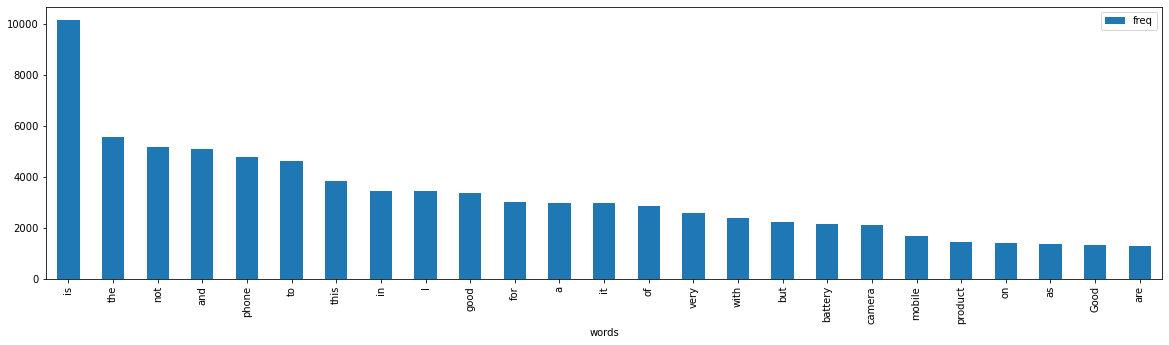

In [21]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5))

Problems with these visuals:
    1.Too many distinct words in the corpus of reviews
        1.punctuations present in the text
        2.text is non uniform case
        3. there are language connectors in the text- stop words
        4. words with the different forms/tense- charge,charged,charging

Text processing:
    1. text cleaning
    2. get the visuals- bar graph or frequency graph
    3. converting text to numeric matrices


In [22]:
from nltk.tokenize import word_tokenize

In [23]:
all_terms=(word_tokenize(reviews_combined.lower()))

In [24]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [25]:
len(reviews_combined),len(all_terms)

(1674772, 326625)

In [26]:
from nltk.probability import FreqDist

In [27]:
fdist=FreqDist(all_terms)

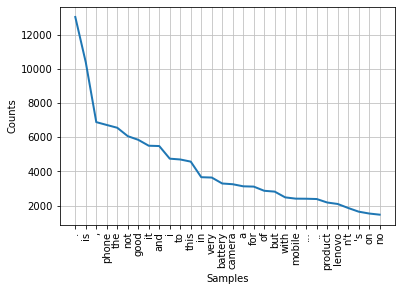

In [28]:
fdist.plot(30,cumulative=False)
plt.show()

The head and tail of the graph is consists of either punct or stop words

which needs to be removed

In [29]:
from string import punctuation
from nltk.corpus import stopwords

In [30]:
stop_nltk=stopwords.words('english')

In [31]:
punc=list(punctuation)

In [32]:
stop_updated=stop_nltk+["...",".."]+["mobile",'phone','lenovo',';k8','note',"n't"]

In [33]:
reviews_updated1=[term for term in all_terms\
if term not in stop_updated and term not in list(punctuation) and len(term)>2]

In [34]:
len(set(reviews_updated1))

16923

In [35]:
reviews_updated1

['good',
 'need',
 'updates',
 'improvements',
 'worst',
 'bought',
 'ever',
 'battery',
 'draining',
 'like',
 'hell',
 'backup',
 'hours',
 'internet',
 'uses',
 'even',
 'put',
 'idle',
 'getting',
 'discharged.this',
 'biggest',
 'lie',
 'amazon',
 'lenove',
 'expected',
 'making',
 'full',
 'saying',
 'battery',
 '4000mah',
 'booster',
 'charger',
 'fake',
 'takes',
 'least',
 'hours',
 'fully',
 'charged.do',
 'know',
 'survive',
 'making',
 'full',
 'us.please',
 'else',
 'regret',
 'like',
 'get',
 'cash',
 'back',
 '....',
 'already',
 'january',
 'good',
 'worst',
 'everthey',
 'changed',
 'last',
 'problem',
 'still',
 'amazon',
 'returning',
 '.highly',
 'disappointing',
 'amazon',
 'telling',
 'buyi',
 'totally',
 'disappointedpoor',
 'batterypoor',
 'camerawaste',
 'money',
 'awesome',
 'charging',
 'heats',
 'allot',
 'really',
 'genuine',
 'reason',
 'hate',
 'battery',
 'level',
 'worn',
 'hitting',
 'problems',
 'hanging',
 'problems',
 'service',
 'station',
 'ahmeda

In [36]:
print(reviews_updated1[:200])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', 'hours', 'fully', 'charged.do', 'know', 'survive', 'making', 'full', 'us.please', 'else', 'regret', 'like', 'get', 'cash', 'back', '....', 'already', 'january', 'good', 'worst', 'everthey', 'changed', 'last', 'problem', 'still', 'amazon', 'returning', '.highly', 'disappointing', 'amazon', 'telling', 'buyi', 'totally', 'disappointedpoor', 'batterypoor', 'camerawaste', 'money', 'awesome', 'charging', 'heats', 'allot', 'really', 'genuine', 'reason', 'hate', 'battery', 'level', 'worn', 'hitting', 'problems', 'hanging', 'problems', 'service', 'station', 'ahmedabad', 'one', 'years', 'warranty', 'change', 'lot', 'glitches', 'dont', 'buy', 'thing', '

In [37]:
for i in reviews_updated1:
    print(i.replace('.',' '))

good
need
updates
improvements
worst
bought
ever
battery
draining
like
hell
backup
hours
internet
uses
even
put
idle
getting
discharged this
biggest
lie
amazon
lenove
expected
making
full
saying
battery
4000mah
booster
charger
fake
takes
least
hours
fully
charged do
know
survive
making
full
us please
else
regret
like
get
cash
back
    
already
january
good
worst
everthey
changed
last
problem
still
amazon
returning
 highly
disappointing
amazon
telling
buyi
totally
disappointedpoor
batterypoor
camerawaste
money
awesome
charging
heats
allot
really
genuine
reason
hate
battery
level
worn
hitting
problems
hanging
problems
service
station
ahmedabad
one
years
warranty
change
lot
glitches
dont
buy
thing
better
options
wrost
good
charger
working
damage
within
months
purchase
item
much
heating
battery
life
poor
faced
battery
problem
motherboard
problem
months
worst
life
good
slim
good
battry
backup
good
screen
love
headset
available
every
time
automatic
kindly
suggest
best
product
according
prize

searching
irritating
search
contact
getting
time
save
contact 5
worst
range friends
pls
buy
better
swear
regret
use
bad
camera
front
camera
good
sound
need
improve
amazing
product
reasonable
price
range
expected
left
speaker
channel
false
right
speaker
working
camera
avarage
double
tap
wakeup
working
properly
earphone
sound
quality
better
using
jbl
satisfied
poor
camera
good
product
product
awesome
great
hang
hota
hai
great
excellent
connectivity
quick
charging
excellent
talk
time
due
large
battery
twin
camera
requires
steadier
hands
mine
ota
update
android
8 0 
bluetooth
connection
intermittent
unstable supplementary
information
claimed
gorilla
glass
screen
probably
ordinary
glass
cracked
slipped
grasp
sitting
sofa
says
screen
covered
reducing
rating
two
stars
fast
delivery
delivery
provided
districts
good
feels
bit
heavy
notification
sounds
adjusted
bit
annoying
photos
takes
lot
memory
much
clarity
memory
features
good
want
return
bodru
using
29th
august this
performance
good but
bat

quickly
pissed
two
days
experiencing
nice
fast
good
battery
backup
good
camera
clearity
nice
nice
features
love
use
nice
upto
mark
especially
camera
sound
quality
good
also
gallery
store
images
need
download
play
store
rest
everything
perfect
good
good
little
bit
heating
charging
think
normal
turbo
charge
    
else
heating
problem
nice
looking
device
camera
quality
expected
    
battery
backup
good
playing
games
spend
good
online
airtel
network
charge
battery
100
morning
time
end
day
ending
40-45
battery
remaining
     
better
product
price
range
nice
found
everything
expected
except
headphone
fone
overall
good
issues
network
connections
especially
using
volte
jio
totally
waste
good
heating
main
disadvantage
everything
good
amazing
contacts
everything
stored
google
bigger
font
size
display
going
screen
signal
indicator
never
full
    
great
compared
predecessors
purchased
08/10/2017
using
days
found
device
fault
software
getting
hang
restart
automatically
 same
issue
consulting
custome

running
smoothly
2 5
monthsafter
hanging
problem
data
book
open
slowly
change
many
problems
device
loving
far
        
great
specs
awesome
performance
best
price
range
surethe
complaint
uses
one
dual
cameras
normal
photos
takes
like
seconds
focus
page
amazing
price
bad
awsome
sudden
sim
slot
working i
think
hardware
problem kindly
fix
soon
possible
excellent
mobilecamera
clarity
superb
front
back
4 8
display
clarity
fine
4 5
battery
4 2
signal
issue
high
3 5
speed
ok4 5
better
4overall
parformence
good
budget
average
battery
fast
charger
saved
show
front
camera
good
rear
camera
normal
mode
good
struggles
depth
enabled
mode
dual
sim
plus
dedicated
memory
slot
added
advantage
bit
android
glitches
observed
nothing
worry
looks
good
venom
black
colour
quite
impressive
amazing
camera
good
perfect
selfi
got
scratch
gorilla
glass
days
use can
get
replacement
really
nice
nyc
product
nice
think
best
price
difference
also
big
camera
decent
perfomance
good
heating
issue
battery
backup
good
worst
e

works
synergy
box
packed
items
buy
headphone
separately
big
product
good
pathetic
product
amazon too
much
heating
low
grade
performance do
buy
working
properly
navigation
button
problemkeyboard
opening
problem
low
price
best
like
worst
product
received
ever
amazon
completely
defective
accessing
data/internet
nightmare
buy
product
pathetic
amazon
allow
return
product
giving
absurd
excuses
never
buy
product
bad
experience
amazing
experience
lenevo
camera
problemno
heating
problemno
charging
problemgood
sound
good
call
quality
good
picture
quality
oreo
update
perfomance
really
bad
means
one
even
imagine
bad
workinv
still
taking
action
repenting
update
battery
issue
biggest
corn
lags
time
happy
product
nice
phonegreat
speed
fantastic
mobile pros
fantastic
display
front
rear
camera
excellent
stock
android
provide
extra
bugging
processor
speed
good
scratch
proof
screen cons
update
works
properly
recently
updated
android
8 0
onwards
heated
battery
drains
hours
use
without
using
call
data
real

good
product
superb
configuration
14k
sir
kindly
provide
handfree
 there
handfree
box
excellent
fabulous
smart
phone no
lag
heating
battery
problems
osm
awesome
worst
experience
20-22
days
use
    
battrey
backup
low
like
3000mah
charging
speed
getting
slow
want
money
back
bad
wasted
money
sad
satisfy
1st
day
first
network
problem
sporting
sim
network
using
airtel
sim
never
got
full
network
changed
slot
slot
always
week
network
sim
using
oppo
a57
working
good
getting
heat
charging
see
pictures
attached
second
slot
also
using
airtel
start
switch
internet
network
lost
automatically
seen
youtube
customer
reviews
vedio
problem
sad
waisted
money
redmi
much
better
price
future
never
try
buy
/moto
 im
disappointed
far
issues
performance
 best
budget
super
camera
best
performance
problem
outgoing
calls
recipient
able
hear
clearly
memory
speed
good
big
keep
pocket
mera
bill
kho
gya
hai
please
mere
email
par
bill
bhej
dijiye
good
options
missing
like
infrad
ray
love
battery
backup
better
worst
p

best
camera
quality
good
charger
product
working
called
amazon
customer
care
refusing
change
hell
nice
fone
received
ear
phones
sealed
box
using
past
months
worst
phonecast
like
basic
function
working
worst
ever
life
dont
purchase
horrible
good
product
improves
depth
camera
battery
life
good
network
connectivity otherwise
cool
product turbo
charging
takes
hrs
fully
charge depth
camera
looks
like
sort
software
tweak
poor
battery
heats
slot
take
2 5
hours
charge
turbo
charging
ummaah
bolby
atmos
love
device
also
due
stock
android
bass
detailed
use
ohms
earphones
sennheiser
300
180
'll
give
enough
loudness
love
sound
output
audio
output
times
better
iphone
motorola
permanent
brands
regret
returning
moto
people
fools
buy
brand
comes
android
google
consider
motorola
phones
flagship
device
days
usage
find
issues
whenever
install
new
app
find
app
app
list
happens
restart
see
app
app
list not
whenever
use
share
minimises
found
glitches
lock
screen
home
screen
also
happen
asphalt
too please
tel

feel
okthe
keys
display
lights
using
night
user
confusebattery
backup
less
compare
plusfront
camera
good
avarge
depth
mode
camera
working
rest
good
decent
bought
product
amazon i
face
problem
fuction
working
like
cast
option
working
internet
speed
miter
havent
dual
apps
option need
fix
problem
search
problem
google
find
many
user
fase
cast
problem
request
urgently
cast
problem
screen
mirring
problem
heating
issue
getting
heated
much
using
r/sir
good
looking
fast
heating
problem
hang
problem
battery
life
good
fantastic
great
value
money
happy
thanks
good
becomes
hot
use
14k
price
many
superior
options
available
good
phone works
faster
budgeted
space have
heating
issue
battery
drains
fast
meet
expections
4000mah
okay
nothing
make
wow
feel
battery
drains
fast
know
4000
mah
lip
battery
drains
like
stay
mode
night
even
charged
100℅
morning
camera
average
processes
fast
hang
delay
accessing
apps
recommend
genuine
review
weeks
hard
core
use
excellent
product
looking
for a
fan
since
last
decad

gimmick
dept
mode
waste
time
money
single
primary
camera
front
back
take
decent
pics
camera
app
definitely
need
improvement the
capacitive
buttons
backlit
faced
issues
dark the
annoying
thing
suddenly
popup
raises
says
amazon
app
responding
app
responding
sometimes
able
launch
heavy
apps
installing
google
play
store mobile
heatsup
charging
faced
issue
playing
games
like
asphalt
air
borne
war
robots
frame
drops
playing
war
robots
powerful
nice
reasonable
price
better
fast
delivery
thank
amazone
excellent
product
good
lot
improvements
camera
however
battery
back
bad
compare
earlier
like
vibe
turbo
lacks
feature
restricting
auto
start
apps
earlier
phones
hence
battery
drains
fast
note though
turbo
charging
takes
almost
hours
full
charge also
one
irritating
thing
notification
volume
ring
volume
disturbs
routine
keep
ring
volume
high
notification
sound
also
highno
schedule
power
on-off
featurewe
expect
add-on
features
overcome
issues
every
thing
seems
good
except
battery
life
issues
status


amazing
front
camera
flash
turbo
charging
work
great
8 0
updates
battery
backup
good
gaming
experience
good
hanging
everything
perfect
star
budget
slow
takes
lot
time
process
pathetic
would
understatement
recommended
excellent
product
     
using
phine
around
10days
working
good
sometimes
facing
network
problem
please
provider
tell
company
give
software
update
solving
problem
came
know
users
facing
network
problem
request
charging
fast
written
takes
2hrs
full
charging
called
fast
charging
thin
heard
name
leeco
eco
provides
52mins
full
charging
called
fast
charging
also
requesting
give
update
types
overall
new
buyer
want
featured
whose
budget
15k
think
need
good
shown
speakers
doessnot
work
properly
never
buy
product
speaker
working
well
amazon
return
facility
working
suggest
download
another
application
device
testing
application
working so
product
make
fool genuinely
buy
gud
buy
heating
related
issues
otherwise
gud
buy
nice
great
battery
backup
camera
thanks
amazon
quality
issue
disap

heat
charging
    
good 
usingbphone
charging
takes
7hrs
full
chagre
ans
battery
drain
quickly
absolutely
best
product
lenovo it
would
better
snapdragon
processor
must
placed
instead
mediatek
pros1 stock
android2
faster
updates3
fast
installation4
comparatively
fast
responsivesmooth 5
speaker
awesome6
dolby
atmos7
headphone
output
bit
avg
design
looks
poor cons1 depth
mode
marketing
gimmick,2 fixed
focus
front
camera,3 both
camera
lenses
poor
quality
poor
camera
performance,4 os
needs
lot
stabilization
battery
starts
behaving
weirdly
guess
due
power
saving
mode
display
quality
poor
killer
lookkiller
camerakiller
360°
sound
dolby
atmosawesome
gaming
performancei
using
last
months
pubg
asphalt
play
together
never
got
hanged 😎
nice
everything
heating
much
charging
voice
calling
good
per
specifications
quick
charge
discharge
turbo
charger
working
days
nice
battery
preforming
good
good
one
buy
cast
screen
supported
good
ordered
recently
products
everything
fine
problem
get
earphones
screen


among
plus
seems
good
me thank
real
great
fully
developed
technology
good
buy
dual
camera
working
way
good
amazon
services
good
looks
works
good but
consumes
lot
bactory need
charge
twice
day
saw
problems
found
gallery
takes
much
time
delete
pics
file
manager
rest
wonderful
great
smoother
sometime
hit
camera
quality
average
voice
call
record
options
lost
within
week
goa
goa
police
calangute
police
station
support
search
price
low
bought
13999
days
11999
battery
quality
back
really
awesome camera
quality
also
good screen
resolution
attractive buttons
bit
hard
fine
enoughspeaker
quality
par really
nice
buy
option
among
budget
phones
best
price
get
discount
hangs
restarts
apparently
something
software
update
quite
ridiculous
one
would
expect
perform
better
update
memory
half
unused
many
applications
awesome
price
good
battery
backup
super
camera
clarity
flash
front
back
huge
memory
64gb
inbuilt
4gb
ram
also
dedicated
memory
card
slot
dual
sim
every
thing
good
tempered
glass
fit
curved
fin

show
charged
might
show
100
charged
turn
suddenly
good
product
reasonable
price
everything
perfect
jat
battery
drains
quickly
dnt
find
turo
charging
worst
one
received
bad
quality
onebattery
backup
hrs
netbattery
charging
take
hrs
complete
chargingphone
used
ironboxdata
cable
working
one
day
battery
good
please
help
good
good
fine
charger
stopped
working
months
use
single
feature
killing
nice
best
much
satisfiedtouch
good
nice
could
little
better
good
value
money
good
built
quality
got
bad
piece
received
daybefore
yesterday
opened
box
yesterday
found
speaker
working
calling
body
hear
voice
pls
send
replacement
piece
send
piece
same this
serous
great
built
smooth
performance
 excellent
travellers
decent
battery
backup
camera
quality
demerit
giving
nothing
this do
purchase
product 1
camera
wrost 2
charging
problems 3
less
features and
many
problems this
expected
battery
problem
heating
problem
sound
good
show
demo
solution
bad
product
dont
buy
amazon battery
working
properly
take
long
ti

games
look
like
premium
system
updat
haging
     
android
version
suppoted
      
battery
pacup
charging
    
good
thankxx
amazon
1day
delivery lenovo
fabulous
look
wise
bulit
quality
spcl
thankxx
battery
guys
normal
user
need
moderate
use
multimedia
want
tell
beware
redmi
people
jealous
everything
price phone
awesome
sound
display
camera
speed
lookonly
con
face
till
battery
4000
mah
work
like but
surely
buy
good
price
venom
black
best
color go
 that
first
review
3-4
days
use last
review
thank
god
returned
within
time
limit
got
refunded
13,999
see
within
month
price
drop
2,000-3,000
even
though
loyal
customer
loved
lost
office
cab
bought
plus
also
way
better i
request
team
work
make
like
plus aman
perfect
mid
range
awesome
features
affordable
cost
     
buy
without
option
best
camera
quality
good
enough
good
pls
call
poor
battery
backup
experience
using
lenevo
since
days
got
first
sale
lot
expectations
went
phone 1
one
worst
ever
used
poor
network
signal
getting
full
signal
airtel
hard

better
battery
good
paisa
vashul
karthik
good
price
range
battery
back
takes
around
hours
charge
good
product
worst
camera
quality
picture
seems
artificial
also
problem
hanging
heating
better
heating
issues
updating
new
systems
work
poor
battery
problem
really
4000
mah
battery
     
haha
     
funny
      
even
works
like
1500
mah
battery
comes
battery
backup
     
bad
    
bought
redmi
pro
     
regret
      
performance
mark
     
slow
sometimes
     
ram
decacore
processor
good
papers
      
heating
like
volcano
       
fear
might
explode
    
heating
playing
games
heavy
duty
stuffs
     
satisfied
      
come
future
sofware
updates
battery
backup
performance
      
else
disaster
battery
pickup
camera
quality
bad
nice
good
features
purchases
nov
2017
facing
issue
charging
since
january
2018 
takes
hour
full
charging
excellent
great
feature
made
camera
clarity
good
best
ever
price
overall
good
product
like
camera
quality
dual
camera
background
blur
good
amount
blur
produces
acceptabl

excellentbecoming
heat
fast
wise
everything
nice
please
buy
regretting
usage
days
return
policy
also
bad
heats
lot screen
good camera
really
waste if
play
games
buy
it network
connection
problems
4gmobile
heat
following
operations1
playing
game
10mins2
charging3
talking
minstoo
much
heat
buy
received
bought
using
card
payment
dead
arrival
even
switching
shame
amazon
nice
handset
using
week
perfectly
fine
performance
normal
apps
best
gaming
guy
business
apps
work
best
lag
heating
issue
charges
fast
camera
ok 
sounds
awesome
normal
earphones
also
good
expected
gud
speed
processing
using
product
since
20th
august
good
par
contenders
like
redmi
recently
launched
moto
g5s
plus
frank
good
way
design
choice
preference
like
may
matter
preference
forget
get
case
slippery
device
bit
heavy
side
big
deal
display
good
wish
could
brighter
built-in
speaker
good
loud
crisp
price
dolby
atmos
gimmick
see
much
improvement
turned
still
want
built-in
dac
headphones
bit
lower
side
see
good
one
audiophiles
s

2nd
received
replacement
defective
first
hardware
problem
second
one
software
problem do
buy
note rated
one
star
enforced
plz
dont
buy
also
victim
amazon
frnd
suggested
inspite
ordered
made
biggest
mistake
heats
like
hell
took
1hour
charge
12-15
contacted
amazon
puzzled
technical
department
smartcheck
app
technician
visit
5days
saying
replace
refund
regular
amazon
customer
first
bitter
experience
becoming
worse
good
camera
price
nice
handseti
love
product
bad
battery
backupdue
mediatek
processor
battery
although
turbocharger
drains
quick
takes
hours
charge
bad heating
gets
heated
easily processing
handle
simple
games
stutters
gaming buy
looking
expensive
iron
box
performance
good
camera
ok 
battery
packup
bad
worst
product
please
buy
frequently
switch
using
device
days
still
found
type
defect
really
killer
notes
price
cameras
really
killer
display
awsome
decacore
processer
working
nice
snapdragon
device
slim
grippy
battry
life
good
say
according
device
really
killer
killer
ever
defecti

sim
cardandroid
available
sooncons
network
problem
jio4gphone
lags
sometimesfacebook
crashesdolby
atmos
usedual
camera
hoax
use
configuration
camera
good
unable
charge
faster
taking
5-10
min
charging
good
headphone
missing
head
screen
guard no
flip
cover mobile
good
worst
bought
last
week
fell
feet
corilla
glass
broken
cheap
quality
previous
phones
fell
many
time
hand
never
broken many
complaints
regarding
model
touch
screen
broken
issue
went
near
service
centre
already
six
phones
broken
display it
failure
model
awesome
phone receieved
days
back
earlier
sceptical
reading
reviews
satisfied
receiving
cameras
working
fine
heavy
bulky
looks
sleek
good
features
good
good
specifications
using
design
display
great
many
bugs
new
product
found
thisfirstly
power
button
working
properly
 secondly
dolby
atmos
working
properly
 third
battery
drains
quickly
found
many
also
processor
heats
extensively
would
request
buyers
look
properly
purchase
worthless
today
sale
better
others
satishfied
ear
set
up

olte
support
karta
kya
gudbuti
ssatisfied
bad
quality
screen mobile
fall
ft 
height
screen
brokencustomer
care
jabalpur
responding
regarding
replacement
screen
even
paid
service
basis
deposited
4200/-
screen
replacement
september
2017
today
26/09/2017
still
get
spare
parts
screen
still
changed
due
casual
approach
servicing
team bad
experience
bad
call
recording
options
call
recording
apps
work
screenshot
capturing
like
old
style
power
volume
sometimes
works
sometimes
definitely
recommended
heating
problempoor
camera
qualityno
proper
packagingnot
satisfied
performance
want
return
order
name
dhale
sifahat
dont
buy
want
use
network
poor
network
sim
jio
idea
airtel
working
properly
deviceit
jst
waste
money
want
money
backi
want
sell
contact
9644051287
good
fantastic
heats
awfully
using
charging
battery
drains
quickly
holding
even
9hrs
normal
usage
losing
standby
icing
cake
amazon
accepting
return
though
amazon
protected
nice
handy
decent
speed
good
space
satisfied
features
speaker
output
l

compared
mobiles
also
battery
heating
problem
amazon
good
service
delivery
 nice
set
smart till
give
star
 and
check
5-6
days
give
final
review
good
value
money
really
good
package
poor
quality
apps
like
responding
 waste
buying
writing
review
months
usage
nice
product
satisfaction
battery
backup
depth
mode
bakwasssss
artificial
lagta
hai
bad it
heating
much
immediately
use
internet
declining
battery
fast
drains
poor
experience
turbo
charging
working
heating
huge
battery
loss
review
week
use
phone heating
problemcharging
super
fastback
camera
patriod
mode
availablefront
camera
goodbattery
last
hours
continue
gaminggetting
hang
use
3-4
hours
continouslyheating
main
problem
facing
right
get
much
heat
get
22gb
free
internal
storage
good
slim
looks
good
performance
also
great
good
gaming
people
battery
life
also
amazing
picture
quality
also
good
waiting
update
record
video
slow
poorscreen
cast
workingspeaker
goodworst
phoneblessing
unlucky
battery
drain
fastly
fan
great
terms
comfort
handl

good
food
long
battery
back
amazing
camera
front
rare
value
money
using
year
absolutely
working
gr8
strongly
recommend
every
one
budget
video
recording
disappointing
hear
speech
recording
volume
low
support
clueless
makes
one
time
consuming
maneuvers
including
factory
reset
-all
purpose
got
issues
like
music
button
alarm
good
good
performance
quickly
unlock
getting
time
10mints
upset
product
damn
good
battery
back
good
camera
pretty
nice
rance
stock
android
experience
nice
build
quality
heating
heating
heating
even
using
youtubeand
picture
quality
youtube
videos
bad
software
issues
bad
giving
updates
camera
good
reviewers
showing
good
problem
sms
app
multiple
msg
selection
delete
option
canno
attch
contact
sms
time
use
hot
problem
worst
evercamera
poor
near
images
good
far
images
blur
everything heating
muchbattery
draining
fast
heavy
average
battery
life
frequent
app
crash
poor
software
support
hotspot
issue
atleast
laptop
calls
volte
using
battery
saver
mode
screen
mirroring
needs
lo

five
star
bad
good
facing
problem
connected
bluetooth
speakers
faulty
productbattery
drain
without
usecharging
also
slow
battery
drain
fast
within
hours
good
product
mainly
issues1
gets
bit
heated
turbo
charging 2
camera
video
mode
stops
working
video
long
worst
worst
amazon
battery
performance
bad
actually
worst and
amazon
cheating
saying
4000mah
battery about
depth
camera
oohhh
please
threre
nothing
like
good
product
nice
hantset
except
build
quality
everything
best
price
super
good
hating
problem
issue
bohut
dera
charge
hota
camera
average
best
product
nice
good
camera
quality
    
charging
fast
     
lightly
heating
otherwise
good
budget
overall
good
battery
good
nice
motorola
operating
system
worst
value
money
nice
bild
quality
thanks
paisa
wasool
camera
quality-just
finebattery
jaldi
garam
jati
battery
backup-fineis
price
par
processer
also
good
satisfied
rear
camera
worst
dual
camera
front
camera
good
good
product
using
regularly
smartphones
geoni
redme
smartphones
intex
aqua
77

solve
problem
product
met
expectations
product
lenova
product
heat
time
hanging
problem
good
look
wise
feature
wise
fills
good
hand
love
bad
nice
expected
satisfied
prob
audio
jack not
fixed
rightly
well
well
battery
backup
sufficient
heats
fast
screen
caste
dollby
atmos
defective
feature
problem
charging
overall
okay
budget
nice
price
     
per
specification
bty
performance
good
overall
good
performance
except
cases
hanging
loads
applications
used
simultaneously
slick
nice
design
dolby
atmos
speakers
great
camera
handy
upto
highest
mark
value
money
look
nice
sound
amazing
camera
okay
overheating
issues
first
day
fine
good
screen
mirror
available
star
less
atlast
hunting
came
end
really
nice
ways
ram
outstanding
performance
camera
good
selfie
comming
net
use
really
fantastic
never
buffer
search
anything
hanging
totally
disappointed
product
big
mistake
company
use
snepdragun
chipset why
best
good
nice
fast
charging
good
bettery
backup
good
battery
heating
charging
lenova
rapid
charger
g

lots
cache
seems
like
someone
used
cache
generation
due
processing
phn
    
screelock
working
    
clearing
cache
started
working
    
wallpaper
blacked
means
interface
freeze
first
day
phn
highly
unstable
software
also
working
properly
dont
buy
also
amazon
customer
service
agents
giving
excuse
proper
process
returning
     
trying
get
rid
scenario
     
poor
product
bought
25th
got
delivered
27th
using
week
say
features
speed
good
sound
good
back
camera
good
ota
update
front
camera
average
battery
survives
day
charges
100
one
half
hour
major
issue
faced
network
issues
incoming
calls
return
amazon
else
good
probably
defect
might
handset
anyways
getting
refund
much
worry
using
months
disappointed there
problem
bluetooth
works
properly
bluetooth
speaker can
give
update
bad
cameras
using
found
useless
poor
processor
heat
much
looks
good
screen
good
battery
poor
even
though
4000
mah
capacity
even
last
hours
even
though
brand
says
turbo
charging
actually
takes
hours
charge
fully
basically
n

heat
using
around
hours
approx
earphones
sound
lesser
others
call
mike
issue
sometime
voice
coming
properly
open
jio
net
call
recording
one
issue
camera
blurs
redmi
camera
better
compared
time
believe
shocked
see
redmi
images
waiting
upadation
gets
new
update
cons
otherwise
pros
dolby
sound
video
quality
pretty
good
lookwise
nice
premium
turbo
charger
gorilla
glass
splash
resistant
faster
net
speed
music
key
nice
fone
great
led
notification
whatsapp
missed
call
performance
good
camera
excellent
price
range
    
depth
mode
dual
rear
cameras
without
selfie
camera
also
good
flash
added
bonus
drawback
big
quite
major
one
battery
     
says
4000
mah
hardly
worthy
2500
mah
really
dat
bad
     
hardly
lasts
10-12
hrs
    
dat
moderate
use
    
called
fast
charging
bad
inconsistent
times
charges
around
min
mostly
takes
like
7-8
min
charge
     
dats
bad
    
feel
like
returning
honestly
dis
issue
    
good
product
best
price
thanks
amazon
////
charger
working
months
usage
good
good
poor
chargi

volte
lte
mat
layna
bakbas
hay
battery
nahi
chalta
hay
battert
getting
charged
getting
drained
early
battery
issue
ryt
start
music
maniac
using
since
one
half
year
preferred
time
dolby
atmos
output
headset
jack
really
worst
    
compared
volume
output
around
     
except
fine
ways
single
star
performance
headphone
jack
battery
heat
drains
faster
fully
charged
take
time
hours
drains
faster
 amazon
taking
return
product cheaten
amazon
return
value
money
good
average
special
best
range
sound
low
sim
tray
working
properly
battery
drained
fast
please
replace
workingbattery
charging
even
2hr0 2
last
day
back
bought
upset
working
jio
sim
heating
problem
also
put
return
request
saying
refund
amount
replacement
placed
best
students
heating
problem
poor
camera
quality
extremely
dis-satisfied
oreo
update
way
return
product
absolute
waste
money
still
use
time
satisfied
product
simultaneously
hanging
apps
working
worst
product
excellent
easy
access
good
battery
life
speakers
volume
could
better
siz

needs
time
cool
facing
issue
update
recently
good
product
takes
hours
fully
charge
worst
product
received
keeps
rebooting
every
second also
worst
customer
experience
ever
amazon the
agents
liers i
would
never
recamond
amazon
anyone
bad
performance
    
lethe
biggest
problem
network
always
remains
weak
compared
another
phonethe
biggest
problem
network
always
remains
weak
compared
another
happy
product i
buy
product
13999but
selling
11999
configuration why
genuine
customer why
gave
cash
back
product
fresh
arrival
buyer really
bad
best
satisfied
product
best
13000
india
deca
core
processor
good
worest
never
recommend
one
battery
backup
full
hanging
problem
hardware
issue
worrest
never
seen
waste
money
buy
mtk
processor
based
especially
deca
core
mtk
smart
choice
heats
rapidly
battery
drains
fast
turbo
charger
making
people
fool
even
charging
30mins has
requested
return
amazon
one
coming
pick
even
week tired
calling
customer
care
executive
good
excellent
good
battery
backup
good
price
rang

phones
purchasing
wastage
money
purchased
dec
2017 
missing
dual
apps
feature
must
good
set
even
low
cost
comparable
cost
everything
average
rounder
music
output
artificial
natural
sound
totally
absent
trend
going
nowadays
even
people
liking
artificial
sound
outputs
dolby
atmos
nice
    
⭐⭐⭐⭐⭐
good
budget
stock
android
strong
battery
turbo
charging
good
feature
cool
camera
experience
dolby
sound
amazing
happy
sent
bill
nice
good
everything
good
except
contacts
getting
saved
web
accounts
option
save
new
contacts
memory
battery
back
excellent
shall
provide
updates
software
including
added
basic
features
music
good
vibe
k5only
one
issue
received
two
piece
soap
inside
box
    
shameful
rating
compulsory
like
display
working
surprise
started
receiving
problem
day
one cons
wi-fi
problem
repeatedly
disconnects
connects
again signal
fluctuation
sim
using
internet
bit
time
problemat
times
body
heats
makes
using
impossibleif
buy
amazon
much
tougher
task
get
replaced
refund
proper
responce
multip

power
superior
worst
used
many
product
one
worst
used
purchased
worthless
feature
functionality
company
cheating
casting
option
ots
support
delivery
time
also
good
star
nice
one
bad
product
good
good
features
faced
big
problem
 mobile
automatically
curved
using
last
days
god
must
tell
amazing
superb
good
review
meet
criteria
good
battery
working
set
good
heating
problem
hanging
problem
using
days
good
working
found
type
issue
charging
time
getting
heatup
reason
wat
terbo
quick
charging
quick
battery
drain
2 3
ghz
havey
processers
must
working
music
player
battery
saver
software
next
updation
       
battery
performance
poor
otherwise
best
nice
price
range
things
possible
nicely
thanks
bad
product
hanging
heat
stable
bettery
good
expected
camera
poor
quality
device
jahnu
shukla
headphones
box camera
expected cant
change
ringtone
use
system
provided
ones
only data
gets
closed
get
calls lenovo
killer
killed
expectations
satisfied
one
rear
camera
working
sim
slot
network
issue please
buy
m

accidental
falls
pressure
screen
camera
glass
cracky
mine
got
cracks
could
even
understand
happened
state
keep
utmost
care
back
cover
screen
guard this
lacks
inbuilt
contact
saver it
saves
email
account lacks
feature
personalise
ringtone
till
download
ringtone
cutter
make
ringtone transfer
files
tough
personalisation
various
options
convenient
ram
usage
remains
always
high
basic
usage
gmail
whatsapp
applications
only adding
cons
months
usage 1 gets
hung
frequently 2 applications
including
gui
gets
hung 3 finger
print
detection
lags 4 no
inbuilt
contact
memory
always
saves
stuff
email
account 5 screen
tough
upto
mark
gorrilla
glass
specified 6
files
get
arranged
properly
camera
good
worst
takes
hrs
charge there
network
problem it
directly
data within
two
days
shows
4-5
times
update battery
draining
fast
worst
misleading
specifications battery
normal
usage
last
half
day camera
quality
great
two
cameras
rear
eye
wash network
issueheating
poor
performance
network
issues
game
install
heat
g

mark
camera
clarity
described
except
everything
fine
nice
product
nice
camera
quality
especially
dual
camera
mode
overall
value
money
product
issues
within
year
quality
still
fast
scan
required
battery
drainfast
got
weeks
ago
still
find
something
new
different
older
moto
play
bought
years
ago
except
finger
scanner the
touch
screen
average
often
misses
touch
commands android
seems
hardly
anything
new
put
money
speaker
sound
high
fairly
good
one
would
expect
csll
quality
good
net
speed
far
seems
okay
good
worst
battery
looking
good
givings
best
performance
faster
works
deca
core
ram but
put
charge
getting
worm
phones
software
nott
motorola
features
nice
experience
purchase
good
performance
good battery
good camera
average design
average heating
issue
app
crashes
weight
slightly
heavy
ekdum
bakwas
hai
dual
camera
working
call
recorder
support
nice
product
amazon
worth
buy
offer
price
nice
device
got
problems
within
month
bought
amazon
honest
review
dont
buy
bcz
waste
money
nothing
major
p

speed
thnx
deca
core
good
battery
commended
turbo
charge
waiting
oreo
update
14k
best
features
packed
one
looks
premium
nice
nice
like
good
happy
product
issues1
heating\2
battery
back
mark,3
bad
cameraover
happy
      
camera
shows
mirror
image
try
take
pic
sort
also
turns
image
turns
opposite
direction
     
please
help
sir
want
full
bill
trust
mee
guys
one
best
definetely
buy
one
lenevo
best
working
new
app
old
aaps
call
recording
fechars
boring
thims
adwans
fechars
hetting
problem
turbo
charging
working
take
lots
time
changed
dual
camera
worth
lees
depth
mode
working
nice
camera
good
compared
budget
phone battery
value
higher
performance
upto
marks option
avail
save
contacts
sim
cards ful
qaulity
movies
also
visible
good
camera
night
mood
good
heating
issue
killer
good
smart
 1 
battery
backup
good
4000mah2
camera
clearty
good
compare
mobiles
front
back
13+5 3 performance
goid
since
decacore
processor
 4 
dual
nano
sim
separate
memory
card
slot 5
features
good
worth
cost
 6 
finger

jayada
problem
toh
refund
bhi
deta
hai
amazon
customer
service
pai
karo
toh
unka
answer
time
records
yeh
hamaray
rules
main
nahi
hai
aur
yeh
hamari
policy
nahi
hum
replace
bhi
nahi
kar
sakte
aur
refund
bhi
nahi
sakte
 3 
amazon
par
purchase
kar
maine
toh
bahut
badi
galti
kar
main
sabhi
logo
request
kar
amazon
par
soch
samjkar
product
purchase
karay
warna
aapnay
baar
product
khrid
liya
aur
agar
aap
koi
bhi
problem
aayi
toh
aap
paise
gaye
 4 
lost
money
product
purchase
amazon5
bad
lots
network
issues
call
cleartity
clear
bad
battery
drained
havey
use
hours
battery
4000
mah
kidding
like
2600
mah
front
camera
good
led
flash
like
nice
latest
features
overall
good
month
one
speaker
stop
working
good
back
cover
damage
heating
problem
cash
back
credit
account-fake
offer
bad
modal
dsp
pandiyanthis
cel
parches
last
days
working
many
apps
true
caller
call
recarder
inbild
cast
ect
    
also
saved
incoming
call
show
name
show
name
ofter
call
ending
ofter
secwhat
happand
ths
much
broblam
must
give


given
preactivated
product
price
new
one along
fast
battery
draining
major
problem
okay
low
budget
best
future
bad
nice
little
bit
hitting
problem
loved
good
awesome
product
 arrived
quickly
works
well
totally
worse
product
buy
serious
problem
message
mail
sms
notification
lighe
working
option
vibration
end
user
pickup
battery
shown
notification
bar
battery
drain
fast
normal
uses
overall
good
product
camera
quality
expected
ok 
work
heating
problem
phone userfriendy
interface
good
battery
backup
speaker
volume
loud
clear
thanks
dolby
atmos
compass
gallery
options
available
     
depth
mode
camera
badbattery
drain
bahut
fast
hai
     
good
horrible
terms
batterybattery
promised
turbochargepoor
battery
performance
even
lags
beginning
itselfbattery
drain
pathetic
hardly
stands
daywhich
promisedcamera
good
woth
less
features
work
mode
signal
strength
week
recommended
even
ready
replace
product
awesome
added
features
compare
previous
handset
vibe
plus
comes
one
back
cover
added
advantage
pr

mark
normal
device
delivered
16th
sept
span
one
week
issue
restarting
usage
idle
approached
service
center
took
days
time
returned
back
saying
wont
issues
less
two
days
service
started
behaving
still
service
center
    
finally
suggestion
making
decision
buying
motorola
please
visit
service
center
near
seeing
number
people
carrying
new
mobiles
come
conclusion
waste
money
first
waste
time
approaching
dont
know
companies
still
using
mediatek
thoug
makes
lot
issues
decided
buy
mediatek
empowered
mobiles
excellent
love
value
money
overheating
everytime
better
samsung
price
range
excellent
use
heating
problem
product
good
receive
headset
box
good
product
happy
product
amazon
grt
camera
disappointed
lot
dull
camera
super
awful
 though
4000
mah
battery
battery
drains
quick
also
slow
charging
 it
says
turbo
charger
slow
also
gets
lag
often
getting
heat
using
dosti
mat
lene
kyoki
bahut
heating
hota
hai
product
good
camera
quality
good
enough
nice
processor
solid
metal
body
good
warms
quickly
di

updating
android
behave
like
micromax
5000
battery
drain
fast
heal
like
iron
press
hang
like
512mb
ram
speed
like
carbon
dear
friend
plan
buying
device
buy
update
android
yes
worst
ever
user
able
place
call
could
possible
guys
testers
everytime
try
call
someone
disturb
service
gets
activated
automatically
place
call
plz
plz
plz
buy
buy
small
feature
publishing
killer
yes
killed
expectations
money
well
possible
'll
give
minus
stars
review
calling
prob
facing
many
issues
device
bakwas
crap
waste
money
worst
worst
worst
    
good
camera
nice
available
internal
storage
47 96
ram
3 7
1 5
already
used
thing
battery
backup
good
fully
charged
battery
stand
hours
last
using
redmi
also
4010
mah
battery
battery
backup
minimum
hours
net
disappointed
battery
backup
facing
charging
problem
audio
low
like
received
original
invoice
otherwise
product
item
bills
problem
purchase
tha
bills
performance
good
turbo
charger
charges
hrs
getting
tremendous
amount
issues
force
close
running
apps
also
background

rest
good
verry
nice
high
colety
like
battery
super
ordered
charger
work
got
replaced
see
screen
cast
work
smart
bluetooth
connectivity
also
good
device
keeps
disconnecting
good
device
good
battery
backup👌
good
processor
using
week
face
heating
problem
tis
9/10
built
quality
good,9/10
battery
backup
good 7/10
real
camera
works
fine
like
normal
camera
buying
camera
thought
camera
great
okie
okie
10/10
processing
fast
lag
works
smoothly heats
lot
charging
playing
online
games
like
clash
clans charger
makes
much
noise
cant
use
packed
room
produces
annoying
noise 10/10
finger
print
sensor
best
good
    
canect
option
mirror
casting
    
best
advance
technology
producti
like
first
time
switched
brand
moto
overall
good
cam
8battery
9overall
10plus
point
gorilla
glass
    
thanks
bed
product
b t
working
properly
much
hanging
slow
internet
working
camera
bed
bed
experience
amazon
nice
battery
back
small
compare
redmi
camera
aswom
specs
one
needs
14k
price
bracket
battery
life
bad
5-6
hrs
batte

stay
away
thoughts
buying
product
    
good
day
guys
please
buy
totally
waste
money some
basic
feature
like
screen
casting
also
never
works no
zero
rating
rating
one
star
getting
heatedcamera
quality
badtotally
disappointed
product
upto
expectations
good
bakwaas
overall
good
depth
mode
camera
working
properly
dolby
sound
dolby except
every
thing
good
everything
else
good
except
camera
trying
improve
camera
software
update
improvement
mark
good
overall
good
product
oreo
update
readyly
available
4000
battery
support
core
processor
dies
give
extended
battery
life
heats
even
simple
activities
movies
body
great
full
metal
in-depth
mode
show
please
buy
taking
hours
fill
battery
battery
consumption
also
battery
getting
easlyy
many
issues
phone1
support
call
recording
function
neither
third
party
apps2
dolby
atmos
doesnt
work
called
support
say
every
time
clear
cache
restart
phone3
support
volte4
many
third
part
apps
supported5
battery
drains
fast6
heating
sometimes
makes
scarry7
speaker
good


faltu
heating
lot
star
everything
    
heating
much
somthing
system
updation
heating
issue
buy
buy
amazon
least
product
sold
pay
never
refunded
though
worst
product
burns
ear
piece
charge
browse
overheating
travelling
worst
poor
quality
ever
seen
worst
user
interface
smart
activity
although
smart
total
loss
11999 
worthy
care
customer
buy
products
never
purchase
find
better
option
also
poor
return
policy
user
change
purchased
west
money
please
another
option
overheat
battery
parfom
bad
nicwbut
display
clarity
differs
white
display
along
free
cover
deca
core
4gb
ram
dual
camera
selfie
flash
separate
card
slot
along
dual
sim
course
5 5
inches
complete
package
cost
awesome
smooth
user
friendly
major
issue
network
issue
also
battery
drain
soon
totally
satisfied
product
depth
mode
working
properly
    
look
average
phone best
gaming
good
worst
product
third
class
batter
cheap
series
sensor
call
record
smart
call
receiver
hyped
decacore
high
performing
reality
old
faster
two
major
problems
n

like
internet
connection
always
warm
connected
internet
update
usage
days
dont
prefer
one
invoice
copy
really
good
cost
     
really
impressed
know
piecesbut
gets
hours
get
full
charge
battery
back
notso
good camera
excellent stylish
puchased
cashback
scheme
best
charger
working
decent
quality
touch
invincible
camera
also
good
selfie
great
net
speed
awesome
put
sim
time great
amazon
delivery
happy
full
charge
worst
mibile
awesome
good
charger
directed
please
new
charger
send
good
value
money
battery
backup
like
4000mah
sometimes
hanged
waste
product
hanging
prblm
camera
quality
poor
compare
rendu
buy
ordered
26-9-2017
today
speaker
working
shot
taken
using
asome
dolby
depth
mode
still
receive
oreo
update
things
lag
plz
give
update
soon
totally
worst
set
dual
camera
working
heating
issue
image
video
quality
also
bad
aswm
    
worst
product
damm
good
 4stars
gets
heated
net
browsing
charging
finger
print
sensor
really
quick
 battery
backup
moderete
good
fastest
given
price
easily
multita

buyers
think
manufacturing
defect
really
see
issue
get
addressed
immediately
ask
opinion
wait
days
revisit
new
comments
posted
buyers
battery
issue
stands
resolved
end
day
point
buying
battery
issues
like
buying
vehicle
fuel
injection
issues
last
long
worst
damaged
heating
issue
camera
worst
    
awesome
service
excellent
product
good
a6000
plus
better
ordered
18th
august
12:01
got
19th
really
nice
amazon
delivery
overall
good
question
camera
quality
better
next
update
hang
use
four
month
plus
heated
sometimes
super
good
speaker
problem
want
waste
money
please
buy
worst
part
cant
even
return
little
bit
hated
product
bought
amazon
since
battery
draining
fast
recent
software
update
product
battery
backup
become
good
feel
like
4000
mah
battery
power
good
performance
battery
backup
poor
app
management
finest
nice
set
    
run
good
worst
full
heating
issue
battery
draining
nice
heating
problem
fack
amazon
fack
good
good
heating
machine
amazing
price
point
price
11000
lack
tiny
features
diss

good
performance
heating
problem
nice
heating
problem
working
properly
signal
issue
product
costly
price
range
priced
10000
one
shall
order
product
great
performance
good
camera
good
battery
good
looks
could
great
lacks
features
like
screen
cast
chromecast
camera
improved
low
light
memory
power
could
better
fir
price
point
definitely
great
keep
working
make
game
changer
heating
problemheat
fast
charging
surfing
net cameracamera
expectedbatterybattery
drains
fastdoesnt
provide
earphonesproduct
delivery
late
courier
good
product
product
really
good
features
reached
expectations
buyed
sep
writing
review
approx
month
use
used
every
way
also
got
update
feature
slow
motion
     
people
give
one
star
comment
good
think
range
company
providing
much
feature
great
processor
love
speed
gamer
type
user
end
would
like
suggest
camera
gud
slow
motion
gud
good
looking
battery
backup
camera
clearity
mark
speaker
nice
fast
charing
works
get
heated
fast
nice
product
defect i
received
sefly
product nice
j

quality
high
performance
excellent
problematic
      
heating
ishue
posting
review
months
usage initially
looked
good
started
using
found
many
problems 1
contacts
click
contact
screen
goes
blank
cant
open
contact 2
mirroring
function
want
mirroring
projector
possible3
bluetooth
doesnt
work
searchable
bluetooth
device
cant
search
active
bluetooth
device4
camara
nothing
great
duar
camara
back
front
camara
average
result 5
charging
takes
long
time
sockets
dont
know
why 6
front
sensorts
great my
overall
verdict
get
better
option
price
primary
camera
poor
snap
clicked
photos
look
dull
come
call
recording
feature
inbuilt
well
third
party
app
records
self
voice
worth
price
neither
comparable
redmi
battery
vest
good
product
battery
backup
good
nice
looking
smooth
touch
camera
quality
sound
quality
mark
specially
sound
quality
poor
sound
quality
far
better
sound
quality
best
specs
category
best
available
price
2nd
consecutive
brand
purchase
self
use
reliable
brand
poor
material
divas
bed
hit
he

functions
getting
clicked 3
bockeh
effect
good
expected
judge
subject
get
bulr
subject
also 4
heating
problem
using
bluetooth
internet
simultaneously 5
gallary
playstore
gallery
good 6
gaming
sometimes
hangs 7
hanging
issues
starting
running
applications
also
anything
battery
fixed
non
removable 8
many
functions
working
like
screen
casting
detect
smart
usb
cable
detected
pc 9
automatic
voice
call
recorder
works
one
app
works
paid
650 overall
stars
per
price
fuctions
good
experience
overall
featured
owesome
headphone
availble
product
good
heating
bit
problem
fast
gud
worst
getting
charge
days
battery
draining
fast
heating
issue
well
average
better
moto
plus
rather
satisfied
packing
good
content
makes
feel
secondhand
supplied
suchitra
electronics
hyderabad
taken
pack
switched
charge
back
cover
plastic
bluetooth
downloaded
apps
shown
cheating
activity
doubted
good
smartphonegreat
looking
good
performance
everything
good
battery
charging
time
100
less
hours
takes
hours dual
camera
feature


link
page
browser
used
since
speaker
bottom
put
call
speaker
experience
annoying6
black
screen
smart
gestures7
extremely
heavy
too its
supposed
8th
update
knote
series
functionality
wise
seems
basic
although
lag
charging
pretty
quick
brand
new
purchased
received
28th
august
2017 
lots
issues
first
day
getting
charged
bluetooth
working
wifi
working
portable
hotspot
working
issues
cpu
use
usb
tethering
battery
actually
reduces
instead
charging
staying
stable
heats
lot
say
normal
might
even
faults
may
discovered
used
much
received
three
days
ago
chance
explore
more not
even
happy
service
amazon
india
extremely
disappointed does
give
confidence
buy
anything
form
amazon
anymore
type
service
received
nice
owsome
would
good
front
camera
good
completely
happy
product
price
bracket
heating
issue
guys
unless
use
heavily
even
human
mind
get
hot
use
limit
day
day
usage
good
highly
recommended
love
device
poor
quality
camera
stops
working and
screen
bends
buy
world
worst
good
product
mid
range
came

center
per
new
screen
cost
mrp
i e
approx
6000 other
disappointed
things
seems
heating
problem
also
heat
charging
bad
thing
lenovodull
screen
weak
networkdolby
audio
strategy
selling
purposes
earphone
issue
sound
quality
low
bad
earphone
earphone
fully
enter
point
many
times
music
stops
plzzzzz
fix
third
class
specification
wrong
think
heating
much
taking
hour
get
charged
fully
think
cheater
company
bought
good
network
issue
earfone
problem
nice
product
features
price
thanks
satticfied
dual
standby
mentioned
true only
one
sim
use
time i
ordered
sim
would
better
network
simultaneously
feel
like
cheated
best
price
good
purchase
overall
best
choice
one
charging
heating
issues
using
time
heating
best
atomos
camera
good
far
noticed
problems ca
set
music
song
ringtone
option secondly
option
speed
dialing
good
one
awesome
dual
back
camera
clearly
focus
object
truely
satisfied
service
music
key
working
camera
also
good
worst
batrry
heating
problem
good
experience
plus
dual
camera
high
definiti

android
neat
face
lagging
heating
initial
use the
disappointment
turbo
charging
especially
camera
turbo
charging
quick
expected
bit
disappointing
still
decent
speed
live
it the
camera
experience
one
worst
come
across
five
years
sure
bad
piece
received
low
quality
past
used
nexus
meizu
redmi
moto
plus
compared
mobiles
camera
specifications
bit
high
one
major
reasons
went
one
camera
specs
boasted
sadly
pics
either
depth
mode
hdr
even
normal
mode
low
quality
would
rate
camera
1/10 if
worried
camera
returned
alreadyp s
sure
piece
fault
one
far
experince
goes
total
waste
money
purely
worst
camera
experince
updating
8 0
oreo
best
functioning
properly you
feel
useless
nice
range
best
range
gaming
turn
using
gets
truns
fingerprint
scanner
work
difficult
replace
return
heating
awesome
suber
performance
superb
nice
smooth
curved
edges
gives
good
hold
comfort
rather
firm
sharp
edges
performance
makes
worthy
also
protective
gorilla
glass
top
quality
splash
resistance
nano
coating
technology
androi

face
coz
play
games
feel
social
sites
imp
become
priority
gets
heat
lags
hangs
keep
aside
study
somethin
else
calls
emergency
texts
something
imp
need
given
priority
ryt
cell
allow
take
already
displaying
battery
saver
mode
sigh
 if
'll
read
wholeeee
thing
thanks
sorry
time
write
abt
good
things
cell
sure
'll
find
many
sources
find
 few
good
things
know
use
frnd
cell
takes
amazing
pictures
day
light
love
taking
pictures
though
cell
way
better
cell
phones
performance
update
amazing
smooth
able
switch
real
quick
better
phones
many
stuff
rated
three
coz
eventually
lacking
everything
love
cell
mean
cell
really
good
unstable
updates
ruined
battery
poor
touch
poor
seller
    
worest
ever
old
plasticy
feel
avarage
camera
hate
thisi
want
exchange
please
khanik
bade
hot
hoa
jay
good
problem
still
batter
vibe
k-4
much
differences
bow
prise
less
prise
available
10,999
cave
12,999
call
recording
feature
ridicolous
value
money
camera
good
good
product
excellent
camera
quality
outstanding
amazon
del

blureness
looks
artificial
edited
cheap
photo
editing
software
battery
drains
quickly
stock
android
much
overloaded
google
ads
even
screen
locked
video
ads
keep
playing
generates
sound
brightness
fail
lower
intensity
dark
cast
device
screen
fails
detect
even
video
player
cast
screen
device
provide
feature
exchange
need
pay
exchange
amount
great
everything
fine
battery
backup
good
notification
light
working
properly
change
set
ringtone
manually
camera
quality
good
worst
sale
service
ever
seen
product charger
working
within
days
purchage lenovo
service
center
rule
adapter
change
krwane
liye
sath
bill
laaousk
baad
test
krenge
ghnte
tak jisme
fon
sara
data
khtm
hone
risk
h fir
charger
replace
krenge itni
ghtiya
service
kisi
company
nhi
hwill
never
buy
product
company
future
bought
device
launch
happened
happy
performance
battery
backup
much
worried
heat
issue
price
drop
see
huge
price
drop
within
month
good
product
price
line
excellent
good
smart
cool
months
since
time
purchased
great
got


specification
looks
great
paper
reality
everything
sucks it
gets
heated
even
normal
usage
battery
drains
faster
normal
mobiles
4000mah
battery
sure the
camera
looks
good
better
zoom
taking
long
shots
picture
quality
mark it
behave
like
4gb
ram
rather
responds
like
2gb
ram
gets
jammed
frequently i
installed
many
apps
getting
slowed
removed
aps guys
price
reduced
still
shall
better
brands
like
moto
samsung
good
camera
mark
photo
loving
guys
've
wasted
money
buying
smartphone
video
recording
quality
worst
've
purchased
specially
camera
made
fool
really
sad
faced
charginga
heat
issue
days
usage
buy
bad
battery
sucks
takes
long
time
charge
good
product
good
isme
screen
bhot
jaldi
tut
jati
hai
mera
bas
bhot
aram
gira
aur
iska
glass
tut
gya
worst
good
money
value
features
wow
auto
network
switch
optionno
smart
stay
screen
etc
6overall
good
worst
batrey
charges
slow
batry
drains
faster
heats
quickly
buy
pls
waste
money
    
poor
camera
display
color
issues
hearing
sounds
problem it
earphone
pa

qwality
camera
smm
unable
connect
wifi
shows
connecting
wifi
never
connects
response
help
service
centre
think
camera
bugs
would
like
return
heating
taking
hours
battery
charge
poor
getting
heat
want
replacement
never
used
like
product
cons
call
recording
app
supportunstable
software
behave
strange
mannerno
automatic
screen
light
callservice
help
helpdesk
poor
using
almost
nine
months
plus
good
build
good
specifications
stock
android
decent
batteryminus
ordinary
camera
dual
effects
non
existent
battery
charging
issue
regular
chargers
charging
speed
slow
lagging
good
price
mob
heat
time
charging depth
mode
properly
work bt
mob
battery
backup
good front
camera
good
like
gorilla
screen
smooth
work
    
dolby
sounds
good
     
worst
screen
sensation
battery
price
good
problem
yet
rectify
 casting
working
heating
problem
good
feel
believe
haters
know
really
wonderful
experience
perfect
best
mobiles
money
reviews
heating
use
security
master
clean
master
application
cool
google
play-store
hop

via
bluetooth
device
music
point
view
worst
product
may
got
defecred
piece
jitna
socha
usse
bahut
jyada
bura
experience
rha
santh
risk
liya
tha
maza
bilkul
nhi
aay 2
maah
nhi
huye
aur
update
kiya
fir
display
kabhi
blink
krta
kabhi
kbhi
itna
heat
deta
drr
lagne
lagta
sala
blast
jaye
dwnldng
speed
buri
total
avg
bura
bad
networknetwork
weak
product
cool
    
love
this all
features
specified
good
well
designed
piece
available
lowest
possible
price
product
level
please
refund
amount
contact
number regardsyasir
siddique9711193815
overall
good
heating
charging
duel
camera
work
properly
also
video
call
option
plz
dont
battery
backup
utter
worst
even
though
mentioned
4000mah
getting
hardly
4hours
without
data
getting
4hours
time
get
full
charge
inspite
turbo
charger
getting
lot
heat
time
utter
worst
battery
backup
power
charging
rating
nice
performance
cemera
results
also
good
learn
use
professional
mode
battery
backup
also
good
performance
speed
well
wonderful
product
satisfied
good
excellent

product
good
built
quality
dolby
atmos
sound
really
great
heating
issues
far
using
two
weeks
battery
power
amazing
camera
really
good
yesit
nice
best
category
good
super
fast
delivery
awesome
department
love
using
past
days
satisfied
phone only
disappointed
amazon
service
bad
good
quality
good
battery
good
product
nice
cost
love
one
problem
one
sound
working
product
good
awesome
worst
ever
lenovo cast
screen
working hike
voice
call
working heat
soon dual
camera
garbage why
buy
heating
issuecall
drop
super
nice
camera
speed
really
good
screen
damaged
replace
super
quite
happy
performance
absolutely
horrendous
battery
life
good
works
well
battery
runs
time
make
things
worse
charge
fast
reason
takes
hours
get
charged
expected
using
devices
long
time
never
problem
earlier
product
pathetic
value
money
support
voltecamera
quality
really
bad
compare
lenova
vibei
brought
lenova
based
expectation
lenova
vibe
better
lenova
vibebut
lenova
worst
lenova
seriesnot
value
money
super
smartphone
nice
b

draining
fastly
heat
even
min
normal
gaming
network
never
shows
full
shows
signal
time camera
deapth
mode
good
mentioned
lenovo complete
wastage
money
worst
camera
quality
front
back
satisfied
product
fast
charging
minutes
buy
product in
months
pay
2000
servicing battery
drains
faster
gets
charged does
even
provide
adequate
standby
time
battery
gets
drained
overnight
gets
switched
even
background
application
running
network
auto-brightness
option
ram
always
occupied
matter
whatever
clear
lags
even
simple
games
like
subway
surfers with
features
advertised
price
range
frustrating
worth
aug
2017-
best
config
date
price
battery
performance
like
2500mah
capacity
screen
time
average
4hrs
rear
camera
good
selfie
camera
tooo
good
performance
excellent
dolby
atmos
average
nothing
particular
waste
money
    
buy
handset
trying
return
    
worst
suggest
pls
mobiles two
major
issue
heats
battery
drain
fast
getting
heat
battery
getting
weak
within
hours
using
data
connet
good
camera
decent
battery


fail
k-series
finally
brought
disease
finished
motorola
says
back
made
moto
mobility
notes
notes
good
phones
excellent
crap
throw
away
completely
unpredictable
signal
reception
strong
signal
data
strong
signal
another
minute
zero
signal
strong
signal
bad
call
quality
inconvenient
user
experience
k-series
legacy
done
motorola
legacy
oblivion
good
device
budget
specifications
look
options
price
range
good
good
price
range
good
product
great
paisa
wasool
sound
audio
goodcamera
quality
poordisplay
screen
good
super
stable
often
misbehave
calling
mode
battery
drain
toooo
fast
thus
sold
half
price
using
month
nice
one
design
bad
heavy
camera
performance
dull
fingerprint
sensor
works
well
battery
drainage
problem
needs
lot
improvement
worst
ever
jio
volte
working
fingerprint
limited
unlock
only battery
okspeed
oknot
worthy
rs 14000
outstanding
price
range awesome
everything
best
ignore
battery
seriously
battery
acts
like
3000mah 
good
fine
nice
good
budget
smartphone
functions
well
though
fac

update
providing
depth
mode
fully
waste
photo
looks
like
edited
3rd
party
application
originality
take
depth
enabled
picture
says
option
clear
background
color
black
white
lie
option
changing
background
color
using
last
two
weeks
buy
one
keeps
restarting
bluetooth
done
work
properly
bluetooth
speaker
music
breaks
play
thru
youtube
google
music
apps
poor
experience
switch
order
charge
bcoz
charge
normal
way
switch
mode
battery
hardly
charges
1hour
battery
also
drains
quickly
    
somebdy
help
wid
dis
worth
amazing
worst
ever
seenor
useda
thia
type
chip
set
hanging
100
gamesworst
performance
overall
good
good
display
good
performance
price
perfect -
cores
runs
fine -
sound
good -
speed
okay
looks
value
money -
camera
quality
great
also
images
dual
camera
depth
looks
somewhat
like
software
depth
rather
hardware
depth
dual
cameras
overall
picture
quality
okay -
earphone
part
set
upto
mark
battery
backup
network
issues
receive
calls
mins
locking
phone lenovo
rectified
issue
even
many
people

bekar
bekar
return
product
please
guide
good
mobile it
smart
lock
option
face
unlock
given best
camera
best
processor best
sound
every
things
good
little
heat
 use
hours
4g fast
charging
back
cover
totally
scratch
send
new
back
remote
sensor
available
nice
gud
camra
good
screen
damaged
gorilla
glass
butwat
happen
screen
damaged
amazing
supprab
four
plus
lte
volte
volte
better
technology
network
selection
also
bad
mean
signal
reception
better
phones
review
buy
worth
good
best
price
range
camera
o k 
sound
o k 
fast
charging
really
works
lagging
problem
must
provide
earphone you
product
good
worked
really
good
beginning but
days
past
see
sometime
gets
restarted
heats
time
alot
within
year
looks
like
battery
also
slowing
down but
though
good
camera
good
use
received
ear
great
performance
device
compared
j7pro
j7max
truly
fastest after
update
fix
network
issue
battery
performance
😇😇😇😇
got
full
charge
half
hur
fast
charging
nice
product
say
best
jus
minor
cam
issues
heat
issue
remaining
bod

needed
resolve
one
worse
product
ever
    
amazon
fake
promises
returning
policies
even
return
one
day
delivery
       
heating
issues battery
drains
automatically
matter
using
not dual
rear
camera
mark
good
product
strongly
recommended
price
rangegood
camera
rare
front
flashwith
long
last
battery
back
upno
heating
issuelatest
android
excellent
price
range problem
faced
coverage
worth
money
good
nice
features
user
friendly
awesome
good
battery
back
fully
satisfied
much
heat
battery
backup
good
battery
quality
worst
stopped
charging
months
good
takes
clicks
unlock
calls
get
picked
calls
get
disconnected
horrible
experience
amazon
helpful
used
bad but
price
low
waste
claims
gorilla
glass
bought
days
ago
tampered
glass
fall
bed
whole
screen
got
cracked
single
scratch
tampered
glass
one
worst
phones
ever
come
across
life
horrible
aspects
battery
gets
drained
half
day
hangs
often
feel
cheated
bill
reserved
good
iam
return
series
always
champion
product
amazing
product
prise
point
cool
new
s

nothing
device
find
manual
book
bill
good
price
range
stock
android
always
better
customized
android
great
good
product
buy
last
year
october
cellphone
coming
heat
think
need
service
kindly
advice
good
good
battery
backup
hanging
problem
heating
problem
miss
lots
features
like
anti
virus
also
camera
could
still
better
awesome
performance
ram
managment
good
heating
happens
camera
works
long
time
camera
quality
con fits
hand
amazing
product
price
really
loved
writing
review
long
time
realised
people
missing
noticing
one
big
disadvantage
phone i
ordered
first
day
sale
got
two
days
day
got
noticed
connect
charging
time
keep
operating
like
watching
youtube
videos
surfing
facebook
wats
app
stops
charging
mean
battery
percentage
increases
increases
mins
so the
second
thing
noticed
connect
data
cable
laptop
cpu
also
charges
charges
slow
rate
like
one
mentioned
above i
asked
replacement
thought
might
defect
set however
even
set
got
replacement
issue
finally
return
refund i
think
manufacturing
d

satisfaction
price
dropped
bought
sad
almost
2000rs
loss
worst
ever
seen
dash
charging
normal
usage
overheats
battery
discharging
quick
net
condition
used
kept
ideal
default
call
recording
option
model
aloneam
purchased
online
amazon
09 10 2017 
following
problems
noticed,1 battery
discharging
quick
net
condition
used
kept
ideal
,2 there
default
call
recording
option
model
alone
whereas
models
option actually
planned
purchase
brand
think
option
4000mah
battery
could
see
demo
purchase
online
purchase
model but
facing
difficulty
expecting
software
upgrade
default
call
recording
option
like
models
suggestions
battery
saving
great
buy
price
features
steal
worth
every
penny
read
reviews
lot
pros
cons
end
reckon
use
optimal
level
heating
worst
purchasedcontact
automatically
vanishdoes
support
screen
mirroringno
support
otgno
gallery
lot
issues
buy
month
old
getting
resale
value
900
amazon
nice
moble
overall
got
defective
restart
inserting
sim
card
first
time
bettery
drain
fastly
hang
problem

price
range
network
issues
it network
less
compared
previous
one
plus
phone also
breaking
voice
call multiple
times
google
apps
could
start
load
bla
bla
bla
messages finally
returned
product thanks
amazon
excellent
happy
battery
last
supposed
great
expectations
wen
ordered
waste
wont
recommend
anyone
buy
super
product
camera
satisfying
good
smartphone
reosnabel
price
tak
sabse
ghatiya
product
dont
buy
it k5
isse
guna
jyada
behtar
hai
turbo
charging
fast
charging
way
took
1/2
hours
charge
first
time
sim
card
slot
opening
1st
day
bad
experience
replace
battery
bad
camera
design
good
nice
prise
value
good
battery
camera
network
issue
persists
handset
compared
handset
location it
creating
echo
effects
speaking
trust
excellent
rear
well
front
camera
quality
soo
bad
specially
front
camera
blur
effect
satisfied
best
range
rahega
apna
standard
kabhi
nahi
sudhaar
sakte
screen
bad
dual
camera
sirf
naam
liye
diya
hai
kisi
kaam
nahi
hai
total
bakwaas
super
battery
draining
little
faster
super
came

1500-2000
extra
purchased
online
per
product
doesnot
comes
warrenty
disgusting
attitude
personal
amazon
stop
selling
phones
use
mode
     
nice
product
bad
product
lenovo after
use
days
one
speaker
failed waste
money
bad
service
amazon
pick
facility shame
amazon
get
heat
quickly
amazing
delivery
time
best
14k
purchased
no's but
one
time
automatically
switch
product
change
urgently
bluetooth
speaker
does't
work
it battery
back
suck
goes
minutes mobile
speaker
price
suck
too dolby
show
case depth
camera
good call
quality
average not
mark
issue
os after
upgrading
oreo
gets
restart
automatically
replace
product
seller
faced
issue
finally
returned
product
 also
faced
heating
issue
bad
product
poor
battery
last
hours
co 
claiming
1 5
days
battery
backup
14000
wasted
first
dolbyatmos
working
expected
really
much
disappointed
company
bought
music
killer
experience
fake
need
solution
lenovobattery
backup
good
4000mah nice
camera
rear
front
good
everything
except
second
sim
support
network
could

every
thing
great
best
buy
15k
everything
good
except
battery
backup
1day
battery
backup
well
writing
review
using
days
well
first
choice
want
buy
redmi
pro
flash
sale
goes
stock
blink
eye
ordered
device
concluded
using
this-1 no
lagging
issue 2 no
heating
issue 3 battery
backup
good
good
like
redmi
size
battery
4100
mah 4 camera
average
guyz
looking
depth
mode
bokeh
effect
device
feel
disappointed
image
taken
depth
mode
poor
hardly
recognize
subject
sometimes
blur
edges
subject
pro
gave
best
portrait
mode
bokeh
effect
price
category 5 front
camera
megapixels
image
taken
look
like
megapixels
camera
taken
sharpness
clear
picture
like
megapixels
phone 6 if
like
listening
songs
watching
movies
benefits
dolby
atmos
sound
system
gave
good
quality
bass
headphones
dolby
atmos
equalizer
provide
true
sound
bottom
speaker
also
good
clear
voice 7 turbo
charger
name
thing
took
almost
hours
fully
charge
phone overall
got
11k
price
found
good
buy
device
looking
camera
pro
costlier
flash
sale
disappo

problems
aroused
suddenly
get
discharged
gets
switched
also
recharging
recharges
please
keep
away
junk
product
conned
want
conned
also
service
center
format
update
software
spite
complaining
display
problem
facing
problem
since
last
days
problem
exist
joke
fooling
tricks
guys
trained
made
junk
word
fits
better
service
team
con
stars
employed
fool
buyers
please
resist
buy
anyother
product
instead
suggestion highly
upset
whole
experience
earphones
found
inside
box i
want
delivered
address
soon
possible
good
price
good
speaking
time
releases
head
always
4000
mah
backup
turbo
charger
2-3hr
full
charge
heating
stuck
slowi
writing
review
moths
usage thanks
poorly
activity
heat
problem
early
battery
low
nyc
ram
management
processing
speed
amazing
beginning
lil
difficulty
camera
rectified
updates
finger
print
sensor
works
great
    
sound
quality
pretty
amazing
surprised
since
dolby
connectivity
issue
connect
device
specially
laptops
good
heating
issue getting
heated
fast
within
mins
hanging
r

play
wheater
audio
video it
average
updated
previous
version
dut
competition
feild phone
looks
premium
good
battery
backup
back
camera
good
compare
back
camera
good
updated
shortcut
features
good
audio
jack
size
small
think
overall
average
small
suggestion
inc 
possible
start
providing
earphones
two
sim
issue
gets
hot
otherwise
ok go
motorola
plus
instead
today
receaved
device looking
good
device but
bit
disappointed
receaved
earphone
liked
much
great
capturing
photos
build
rugged
good
looking
especially
front
view
camera
better
software
tweaked
especially
portraits
 battery
good
cahrging
fast
awaiting
oreo
update
may
improve
battery
lifeeffortlessly
multitasks
dedicated
music
key
cool
feature
 photographs
quite
interesting
nice
daylight
low
light
grainyjust
update
screen
cracked
know
corning
gorilla
glass
effective
put
additional
screen
guard
well
good
buy
heating
battery
dranage
problem
update
delivered
yesterday
15/5/2018
checking
found
earphone
socket
working
excellent
service
time

deficiencies
     
call
recording
facility
available 2
photo
gallery
available
photos
open
google
photo
much
secure
online 3
home
page
disappointing
much
flexibility
available 4
less
options
available
settings 5
led
flash
light
yellowish
warm
white
place
milky
white
cool
daylight
appears
like
bulb
light 6
rapid
charging
working
charging
like
normal
charger 7
meeting/silent
mode
button
available
important
attending
meeting/conferences a
big
noooo
nice
handset
    
take
hours
full
charges
purchase
working
fine
battery
drains
faster
rate
playing
surfing
net
happy
    
heating
issues
    
battery
backup
gud
    
disappointment
guys
gave
discount
1000
days
launch
gud
good
like
good
per
expectation
good
battery
good
video
audio
quality
good recently
slipped
bike
ride
scratches
super
price
rate -ve
feel
lag
playing
games
heat
problem
excellent
poor
camera
quality
heating
issues
fast
battery
draining
slow
charging
fast
charging
pathetic
performance
poor
standard
charging
battery
using
charger


fails
miserably
camera
performance
awasome
waist
money
every
time
heating
problem
battery
back
one
year
time
repair
customer
service
center
please
buy
recommend
anyone
buy
within
one
month
software
corrupted
factory
reset
done
twice
results
service
center
also
able
provide
help
asking
wait
new
update
want
invoice
overheating
using
internet while
charging
also
getting
overheating
unable
touch
time
got
today
fast
shipping
     
totally
satisfied
elder
brother
plus
front
still
plus
better
thing
sound
louder
plus
    
rest
evrything
much
satisfied
star
negative
points
     
thank
wifi
workingcast
screen
workingnetwork
issuesheating
problemoverall
satisfiedreturning
productbut
delay
pick-upstill
product
picked
good
good
except
battery
life
depth
mode
camera
nice
good
audio
quality
display
nice
bettary
capacity is
verr
low
calling
issue
jio
sim
best
budget
smart
good
price
price
nice
good
use
batri
bakp
good
charger
also
good
nise
desgining
look
kiler
good
move
apps
card
awesome
compatible
v

good
mostly
sound
quality
nice
dolby
picture
quality
also
good
front
rear
camera
excellent
good
product
facing
microphone
issue
people
call
able
hear
voice
audible
speaker
turned
poor
music
quality
speaker
headphone
dolby
atomos
show
offcharger
cable
bad
quality
bakwas
pese
kharab
gye
worthy
product
heat
fast
camera
quality
average
use
selfie
camera
app
better
photos
like
cymerabattery
drain
little
faster
good
great
features good
battery
life
delivered
time
nice
price
using
approx
days
writing
review
first
opition
abt
half
cooked
product
lots
issues 1
battery
drain
fast
never
get
feeling
4000
mah
battery
infact
heavy
gamer
music
lover
never
forget
keep
powerbank
yourself 2
using
jio
sim
left
idle
mints
caller
get
message
either
switched
outof
coverage
area
operator
also
network
reception
bad
generalised
problem
forum
already
flooded
problem
user
india
facing
issue 3
camera
good
give
time and
issues
like
battery
drainage
slow
charging
etc in
opinion
dont
mobile there
lots
options
availa

lost
within
hours
support
volte
heavy
weight
happy
product
better
samsung
choose
hangs
sometimes
camera
quality
good
battery
performance
good
nougat
good
use
cam
qualities
good
best
best
price
worst
product
battery
charging
problem
    
refund
piece
average
super
fast
camera
issues
side pics
natural
good
performance
little
bit
heating
cash
back
abhi
tak
mila
nhi
hai
nice
easy
use
good
product
worst
experience
returning
bad
nice
worst
product
amazon
take
back
first
install
smartchk
software
showing
problem
product
camera
vedio
recording
poor
    
3-4
photo
zoom
next
photo
become
zoom
double
tip
press
want
return
amazon
plz
help
launched
killer
honestly
killer
one
today
posting
reviews
using
last
one
week
pros
cons
good
ones
-deca
core
processor
slim
sleek
design
powerful
quick
response
lighting
fast
fingerprint
sensor
feather
touch
brighter
display
feels
classy
brilliant
front
camera
heating
problem
lagging
hang
problem
areas
disappointment
-1 
rear
camera
good
lack
stability
photo
qual

end
performance
gazab
camera
faddu
hang
hota
nhiii
bilkul
bdiya
yes
amazon
service
promise
excellent
awesome
packings
good
product
got
thank
amazon
good
product1
4000
mah
battery
doesnt
last
long
even
hrs2
takes
hrs
charge
100
temperature
raises
high
40°
even
normal
use
like
whatsapp4
depth
mode
dual
cam
working
properly5
hotspot
working6
time
amazon
pathetic
helpful
return
product
first
need
speak
technician
run
test
test
fails
place
replacement
request
need
followup
pickup
come
replacement
replaced
issue
issue
finalized
place
order
refund
less
features
vibebad
experience
awesome
phne
one
lacking
notification
indication
light
app
msg
received
like
miss
call
text
msgs
gmail
good
get
bill
pls
send
bill
mobilee
mail
-sk hasan78696
gmail com
satisfied
camera
bad
sahi
krao
isse
walo
dont
expect
much
perfect
smart
price
15k
matches
many
costly
smart
phones
happy
dont
buy
start
software
issue
day
returned
good
product
earphone
missing
worst
pls
buy
guys
using
days
battery
poor
enough
day
dua

date
ending
3rd
may
get
new
item
replacing
defective
item
permanent
customer
amazon
loosing
trust
sad
started
using
performance
good
good
battery
life
internet
also
heating
issue
overall
good
small
budget
worth
less
brightness
works
gud
bakwas
expect
much
processor
slower
quad
core
camera
good
enough
heating
biggest
issue
improved
fingerprint
sensor
nice
phohe
super
quality
one
word
product
excellent
using
jio
sim
buy
pls
jio
user
goes
ideal
state
mins
incoming
calls
stops
coming
person
calling
hear
msg
reachable
range there
software
problem
volte
rest
good
using
gsm
sim
operator
battery
pathetic
using
weeks
giving
problems
charging
time
return
product
return
window
closed
customer
services
worst
screen
cast
working
connect
smart
screen
touch
tough
smooth3 when
get
charging
get
hot4
battery
left
minutes
sec
switch
offamazon
return
replace
policy
bad
help
anymoredo
product
amazon
bakwas
      
heating
much
fast
markturbo
charger
workingthe
takes
hours
full
charged
good
expect
really
goo

days
use
buy
product
heating
problem
battery
charging
takes
hours
average
camera
let
see
warranty
works
spec
high
performance
avarage
good
handset
great
fine
battery
back
fine
oreo
update
full
issue1
restarting
automatically
again2
fast
charging3
heating
badly
charging
normal
use4
battery
drains
fast5
hotspot
working6
network
connectingin
addition
also
lacks
many
good
features
compared
note1
smart
office
auto
shift2
annoying
screen
capture
sound3
app
lock
feature
recent
app4
pocket
preventionwaste
money
useless
product
good
camera
quality
also
good fast
downloading
speed
low
single
depth
camera
working
like
maybe
going
hill
using
products
fell
love
since
2012
joke
complains
-1 
first
use
start
took
around
minutes
even
getting
longer
longer
often
restart
phone 2
call
volume
automatically
starts
come
lowest3
camera
zooming
terrible
front
cam
terrible
even
take
screenshot
single
recording
video 4
battery
need
charged
2-4
times
every
single
day
night5
lots
heating
used
charging
mode6
hangs

product
lene
inkar
krte
hai
nice
performance
date
    
lte
    
camera
deep
sensing
useless
display
problem
seeing
captured
photo
small
lines
arriving
image
want
return
it it
gets
hot
talking
engineer
sure
last
long i
already
raised
complaint
want
return
product
amazon
listening feeling
cheatedi
wonder
give
negative
stars
hiii
all i
used
last
days here
reviewpros:1 
metal
body
gives
classic
stylish
look2
internal
memory
range
awesome
ram 3 touch
good
full
hd 4 video
recording
slow
motion
also
available 5 new
processor
fast
compared
snapdragon
825 cons:1 
camera
quality
poor
though
extra
camera
back similarly
front
camera
13mp
mark
look
like
fake
images 2 battery
claimed
4000mah
like
3000mah
samsung
phones it
drains
within
16-24hr
time 3 turbo
charging
lenevo
fooling
customers
section
takes
almost
2 5
charge
complete
mobile 4 it
separate
ring
volume
adjustment
media
alaram
message
etc 5 no
headphones
provided
lenevo
set
camera
performance
satisfied
overall
good
device
worst
set
ever
pur

many
setting
options
available
smartphone
first
check
compare
setting
features
buy
heating
problembattery
drying
fastly charging
time
upto
hours
100
awesome
charge
quickly
suppose
worst
product
lenova
please
buy
product
waste
money issue
system
upgrade
happening
provided
lenova issue
system
hangs
selecting
network
provide
entering
pin
unlock
device
restarting please
buy
product
waste
money
suganthan please
buy
product
darshita
electronics
defective
products
customers
battery
worst
even
work
half
day
less
hours
play
music
hours
going
discharge
ok 
wow
waste
battery
low
power
buy
low
volume
used
delivered
mobis
working
fine
 camera
ok for
gaming
perfect
mob
product
description
stated
network
4g+4g
actually
one
sim
terriblealso
finger
sensor
working
properly
hard
use
boring
use it
unwantedand
unuseful
features
good
quality
everything
expected
camera
nice
battery
lasts
entire
day
used
hotspot
fudu
packaging
good i
thought
product
inside
opened
package
package
must
good
soz
product
get
dama

mi3
red
red
red
5and
samsung
/motos
found
better
pros:1 performance
deca
core
good2 storage
52gb
good3 ram
performance
quite
satisfactory
hang
observed
far 4
camera
takes
really
good
pics
day
light
nowhere
price
range
gon
get
megapixel
front
camera
selfie
flash 5
people
love
lot
multimedia
content
storage
quite
enought
kind
users 6
fingerprint
sensor
amazing
far
better
andoid
ever
used
'll
hardly
get
clean
months 7
since
already
aiming
corning
gorilla
glass
need
add
screen
guard
handle
even
knife
point
details
check
screen
resistance
youtube
videos 8
splash
resistant
mistake
pour
tea
water
fully
working
without
damage 9
screen
angle
good
view
movies
possible
angles 10
music
key
really
awesome
especially
people
listen
music
headphones
phones
usually
keo
pocket
next
time
dont
take
change
track
simple
double
pressing
music
key cons:1 camera
mark
even
mi4i
camera
better
one
especially
low
light
areas 2
kind
person
listen
music
loud
volume
maximum
loundness
low
compared
phones
even
iphone
s

bad
impression
customer'sfirst
ever
totally
disappointed
huawei
heat
45°c
prosgood
luking
handy
good
battery
backup
good
picture
quality
good
camera consfirst
piece
received
problem
turbo
charging
desktop
screen
amazon
changed
smoothly you
explore
system
lot
put
ringtone
choice
call
customer
care
centre system
works
abruptly
many
times
vibration
works
many
times
doesn'tsome
time
screen
allow
operate
time
allow
youoption
scrrenshot
separately
available
use
side
button
either
music
screenshot
crop
option
available
screenshot easiness
using
missing
happy
purchase
one
issue
charger
working
ready
complaint
solved
worse
camera
ever
seen
nice
little
heavy
good
price
features
except
back
cam
excellent
good
product
nice
better
able
provide
head
good
empty
box
satisfied
purchase
best
comparison
brands
worst
ever
used
bought
days
camera
start
disturbing
days
camera
flash
light
stop
working
camera
quality
upto
mark
expect
dual
camera
sound
quality
good
looks
functionality
good
battery
backup
also


smjh
ata
amazon
walo
days
replacement
kyo
fir
       
bolte
technician
aayega
phle
phon
prblms
dekhega
fir
koi
solution
paynge
apko
mene
aug
puchase
kiya
aur
aaj
sept
replacement
last
     
smjh
ata
fir
replacement
guarantee
kon
lega
     
performance
good
network
facilitys
low
lte
volte
facility
fast
betry
bekup
good
betry
house
bekup
continue
use
good
totally
wastage
money
loved
sound
video
effect
good
battery
capacity
average
less
features
compared
vibe
series
hand
set
heating
problem
troubleshoot
battery
life
poor they
say
4000mah
battery
even
run
single
day
bad
awesome
product
price
better
life
got
blast
company
doin
nothing
this worst
ever
used
good
speaker
given
one
side
given
sides
like
using
past
days
ever
since
launched
really
good
much
faster
earlier
super
battery
life
vest
money
battery
low
camera
quality
low
product
pls
buy
frds
heats
fast
battery
discharges
fast
fast so
think
improved
pros better
display
price
rangeandroid
nougatsolid
build
qualitydedicated
slots
sim
micr

time
ama
foes
permit
refers
technical
centre
checks
product
says
product
anything
photos
taken
give
blue
tinge
pure
chinese
look
    
seems
premium
highlight
features
actually
giving
thing
excellent
performance
nice
faulty
product
amazing
heating
problem
amazing
problem
dual
nano
sim
dual-standby
4g+4g
single
sim
network
support
dual
sim
work
camera
performance
bad
battery
turbo
charg
sound
issue
working
properly
properly
working
henge
raha
bakwas
product
screen
cast
work
smart
works
chromecast
bad this
stock
android
performance
goodcamera
perfect
battery
bad the
low
quality
gorilla
glass
protection
good
battery
long
lasting
charges
fast
gives
good
performance
heats
little
charging
dual
camera
use
normal
photos
good
depth
effect
bad
want
potrait
mode
however
care
potrait
mode
need
normal
camera
great
mentioned
website
box
contain
headset
along
charger
headset
missing
motherboard
get
damaged
four
months
second
sim
slot
detecting
always
happens
type
sim
ok 
far
good
strongly
recommend
bu

buying
cost
absolutely
amazing
cell
worst
product
returning
back
      
display
flickering
     
horizontal
lines
fluctuating
keypad
    
good
cons
follows:1 battery
last
hours
typical
usage
toy
front
redmi
4 2 
terrible
performance
front
rear
camera
low
transient
lighting
condition
focussing
barely
happens
even
takes
2-3
seconds
get
lost 3
depth
mode
joke
blurrs
hair
try
focus
face
awsome
product
    
excellent
competition
market
bad
user
interface
bad
waht
tell
worst
part
amazon
takenit
back
purchaseing
amazon
trap
plz
dnt
worth
full
system
update
bad
everyday
new
software
update
everytime
update
gets
slower the
battery
draining
fast
charge
takes
time the
switches
sometimes it
takes
minute
switch
nice
fast
hassall
free
    
perfect
battery
capacity
superb
     
water
resistant
problem
    
soreturn
plzzz
flipkart
giving
rs 11,000/-
charger
probalem
days
bought
    
works
good
 everything
perfect
camera
battery
upto
marked
remaining
every
thing
perfect
heating
issue
assume
due
deca
co

since
last
days
would
say
simply
superb
exactly
promised
wrost
series
dolby
atmos
work
properly
battery
drains
fast
sound
quality
well
bad
experience
bad
camera
camera
quality
bad
compare
3gb
ram
one
better
average
product
network
issues
dual
cam
gimic
using
device
almost
months
disappointed
perform
device
depth
mode
worst
gaming
experience
bad
gets
slower
minutes
gameplay
also
providing
regular
updates
quality
product
new
look
excellent
performance
charger
also
heavy
duty
therefore
saves
charging
time
today
need
heating
issue
sometimes
gets
hot
becomes
difficult
hold
hand
like
best
delivery
best
receive
hadfone
box
buy
simply
sayingit
gallery
applock
voice
recordersecondary
camera
working
dual
camera
show
depth
mode
working
jio
network
always
half
like
belowing
reason1-it
hybrid
sim
slot dual
sim
dedicated
card
slot 2-deca
core
processor3-nano
coating4-dolby
atoms
music5-lot
sensor
magnetic
compass
fingerprint
nice
volume
button
bulging
call
recorder
support
basic
feature
phones
like


using
internet
noted
days
amazon
return
product
well
researched
internet
found
users
also
facing
issue
trying
figure
issue
resolved
brand
lost
value
recommend
buying
ever
good
product
first
processor
awesome
look
bad
product
overheating
also don
buy
product
good
buy
november
2017
three
months
working
f9 in
speaker
mode
mic
working
authorised
service
denied
honour
warranty
feeling
cheated
powerful
phoneeverything
outstanding
lovely
handset
gets
hot
use
excellent
initially
problems
like
battery
drain
update
problem
solved
great
performance
never
lags
heating
problem
camera
satisfactory
selfie
camera
excellent
overall
underrated
way
better
redmi
except
battery
back
understandable
powerful
processor
excellent
worst
buy
yesterday
new
one
defects
occurred
earphones
problem
working
jack
plugin
replacement
immediately
observed
heating
problem
voice
recording
availablebattery
backup
good
compare
k4note
product
performance
good
need
check
weeks
quality
product
heating
problem
battery
much
goodit

service
center
put
new
display
cost
8000
buy
14000 on
sept
get
back
music
button
working
due
camera
take
pictures
recording
bokeh
effect
worst
service
center
mapsa-goa
made
good
hand
set
cost
features
good
speed
good
really
using
performs
nice
fullfill
every
dream
customer
heat
charge
watching
movies
battery
drain
fast
support
quick
charge
use
wi-fi
definitely
two
times
must
require
charge
ringer
speaker
one
work
check
delivery
fake
ass
company
call
recording
video
call
using
time
working
front
camera
light
meet
expectations
using
three
days
found
lacking
much
responding
slow
camera
quality
good
even
two
rear
cameras
makes
think
using
old
many
bugs
sometimes
clock
showing
right
time
overall
bad
experience
choose
redmi
think
made
bad
decisio
first
time
purchased
bad
experience
good
thing
dolby
atmos
get
better
options
choose
price
segment
wireless
display
system
use
smart
major
drawback
good
two
cons
heating
issue
charging
camera
quality
mark
third
class
never
recommend
body
facing
heat

display
sharp
unlike
brands
also
heating
problems
camera
impresive
would
recommend
battery
issue
genuine
product
best
range
front
camera
3/5rear
camera
2/5battery
life
3/5processor
4/5
amazon
shipping
excellent
product
came
days pros:1
looks
feel
premium
quality
overall
good
price 2
separate
music/
programmable
key
button
nice
have 3
selfie
flash
helps
low
light
area 4
4000mah
battery
4gb
memory 5
two
nano
sims
separate
tray
external
memory
card cons1
heating
big
issue
heats
lot
even
playing
high
end
games
though
degrade
performance 2
camera
average-
pic
taken
front
camera
flash
low
light
turned
inferior
friends
plus
16mp
camera
without
flash
even
without
flash-
pics
taken
rear
dual
camera
16mp
regular
mode
came
blurry
1st
pic
seems
added
auto
beautification
make
pic
smooth
help
older
coolpad
13mp
much
sharper
2nd
pic
battery
even
fully
charged
drained
normal
usage
play
golf
clash
drains
much
faster
play
continuously
believe
might
die
less
hours 4
feels
little
heavier 5
box
come
headph

nice
looking
great
killer
worst
ever
've
used
amazon
never
help
issue
buy
cheap
quality
wasted
15k
device
excilent
product
super
fast
nicly
built
loved
much
disappointed
packing
producr
worst
safety
cardboard
packing
amazon
please
provide
food
packing
good
wrost
satisfied
worthlessi
request
ppl
buylenidi
used
better
thiski
waste
far
good
good
product
fast
charging
satisfied
per
expectations -
heats
lot
curtosy
mediatek
processor
battery
life
great
even
last
complete
day
average
usage
keeps
draining
quickly
even
standby
many
power
intensive
apps
ergnomic
hold
corners
sharp -
camera
ok-ok 
dual
camera
depth
mode
precise
recording
videos
noticed
lens
focusing
multiple
times
result
keeps
blurring
focusing
giving
poor
outcome
video
see
video
later -
visibility
sunlight
great
brightness
generally
less
increase
brightness
means
consumes
power -
takes
long
long
time
charge
wonder
call
turbo
charging -
noticed
issue
handset
sure
common
across
although
speakers
left
ones
weak
right
speaker
stron

3500mah 4
slight
slutter
lag5
ram
variant
preferable
performance
well
also
black
variant
looks
cool
premium 6
put
tempered
glass
display
2 5d
curved
edges
show
bubbles
around
edges 7
provide
turbo
charger
takes
2 2
hours
charge
fully
good
product
      
fedex
delivered
goods
much
late
     
purchased
8th
october
2017
working
properly
automatically
getting
swtiched
iam
surprised
within
days
problem
occurred
quite
disappointing
please
replace
iam
satisfied
network
keeps
fluctuating
calls
get
disconnected
problem
sim
slots
please
provide
update
कडक
major
heating
problem
hold
mints
use
afraid
using
headphone
included
bed
smartphone
dual
camera
single
camera
better
dual
cam
always
smartphone
one
issue
good
camera
noise
2nd
problem
hanging
problems
good
front
camera
flash
low
initially
reviewed
star
good
comments
months
editing
review
star
available
let
start
oreo
update
sucks
get
charged
extremely
slow
heat
terribly
high
bettery
drain
fast
went
customer
care
center
reset
reinstalled
softwar

quality
super
music
key
also
super
good
price
bad
camera
heating
issues
better
work
properly
heating
sense
user
friendly
everything
good
good
ovar
disgusting
please
purchase
purchased
month
ago
within
days
stopped
working
gets
hung
easily
battery
drains
fast not
recommended
amazon
cheated
mespeaker
mike
working
complaining
playing
stupid
diagnose
test
facing
problem
saying
product
perfect
first
last
never
ever
think
amazon
fraud
forcily
giving
star
heavy
delay
switching
on/off
constant
errors
using
double
sim
2 55
min
value
money
want
buy
pls
venovo
user
answer
good
camera
faulty
cames
good
description
tion
worst
gaming it
deca
core
namegame
lags
heats
good
nice
must
buy
suffer
low
battery
problem
low
storage
problem
need
think
twice
buying
months
usepros value
money
daylight
camera
battery
backup
4000mah
 fast
charging music
key
multi
tasking
front
flash
dolby
screen
etc cons
picture
quality
low
camera
lags
using
dual
camera
night
photos
worse
cant
see
anything
clearly
get
hanges
some

problem
basic
features
missing
call
forwarding
call
waiting
touch
keys
light
etc
essentials
features
given
company company
launching
software
version
update
music
key
work
properly
battery
drains
quickly
nice
satisfied
except
audio
product
many
defect
like
screen
problem
screen
rotation
problem
worst
worst
battery
battery
getting
drained
hours
heating
issue
bonus
good
great
received
2days
every
thing
perfect
even
got
updates
installed
camera
problem
got
overcomes
one
problem
battery
draining
problem
battery
performance
poor
features
superb
good
use
power
bank
travelling
long
wonderful
camera
good
expected
much
heating
issues
browsing it
excellent
design front
cam
good
signal
issue
jio
work
properly
battery
heat
problem
nothing
worst
hangs
lot
battery
backup
hrs
use
use
worst
awesome
selfie
good
dim
light
best
10k
got
price
using
discounts
offered
momentreally
nice
performance
good
camera
quality
waste
time
money returned
day
never
totally
worst camera
clarity
good they
provide
return
e

may
clear
shot
night
continuously
hanging
restarting
stopped
working
completely
blue
screen
appeared i
raised
return
request
however
due
amazing
return
policy
amazon
unable
return
defective
product
supposed
send
technician
inspect
product
approving
return
technician
supposed
visit
bother
come
switched
tried
call
customer
service
several
time
call
getting
connected
customer
rep 
extremely
dissatisfied
services
policies
amazon
good
good
set
product
gets
heated
soon
remains
hot
time big
drawback/loophole other
features
good
poor
sound
quality
received
one
charger
good
expectations
camera
battery
performance
poor
according
specifications
provided
company
best
headset
box
headset
provided
mentioned
total
rubbish
heats
much
even
touch
works
properly
battery
drains
fast
display
also
good
needs
maintain
standard
key
structure
upgraded
found
back
soft
key
traingular
located
left
side
located
right
easy
comfortable
right-hander
back
speed
superb
battery
okcamera
quality
good
nice
good
camera
bat

notification
missed
calls
unreaded
message
whatsapp
apps
good
budget
fell
height
jst
bed
broke
screen
within
time
moreover
long
day
searched
service
centre
could
find
one in
aligarhthis
stops
application
open
gives
msg
app
stopped
good
charging
takes
whole
lot
time
battery
also
drains
pretty
fast
bad
performance
weeks
purchase
getting
turn
even
100
battery
restarting
2-3
hrs
even
speaker
issues
superb
product
came
old
firmware
took
hours
update
multiple
updates
thought
upgrading
lots
good
features
missing
definately
worth
moneypost
oreo
update
heating
lot
service
center
resolution
little
bit
heating
problem
big
battery
issue
heating
issue
worst
4hrs
battery
life
heats
hangs
amazon
tested
confirmed
battery
draining
taking
back
box warning-do
buy
sell
buy
another
easy
handle
even
travelling
battery
life
excellent
gets
little
warm
used
half
hour
stretch
tough
yet
trendy
good
little
problem
network
connection
also
getting
heat
good
one
good
except
slight
heating
issue
photo
quality
good
he

phones
seems
ok 
battery
poor
drains
far
better
compared
never
buy
phone it
loss
buy
returned
days
amazon
return
policy
also
good
assign
person
check
take
time
amazon
refund
replace
another
troubles
later
requested
refund
huge
process
flipkart
simple
net
work
signal
ful
is't
work
set
custom
ring
tone
totally
poor
missed
call
message
coming
notification
light
glowing
solve
problem
excellent
product😄
set
problem
need
help
bad
low
light
camera
quality
poor
screenshot
icon
mentioned
futures
mentioned
amazing
product
heating
issue
battery
could
stayed
lil
longer
4000mah
description
great
features
looks
good
headsets
provided
box
nice
4gb
64gb
features
awesome
received
14 09 17
promised
issue
battery
life
matter
concern
today
updated
regarding
issues
let
see
overall
good
choice
good
around
10k
round
performance
wort
product
got
damaged
one
issue
network
amazon
service
good
dnt
buy
product
4 5
stars
received
22/03/2018 i
lot
research
buying
issue
people
overheatinglow
battery
optimizationdept

# Stemming
    - A technique which takes the word to its root form 
    - Its rule based and removes suffixes from the words
    - The stemmed word might not be part of the dictionary
    - 2 types of stemmers:
        1. porter stemmer - old stemmer developed in 1979
        2. snowball stemmer - support multiple languages, faster and performs better than prter steemer

In [38]:
from nltk.stem import PorterStemmer,SnowballStemmer
stemmer_s=SnowballStemmer('english')

In [39]:
print(len(set([stemmer_s.stem(word) for word in (reviews_updated1)])))

14606


lets build a udf
- input : review
- Tasks : All the above cleaning steps
- Return : Cleaned Review

 based on the outcome of this function you should able to add new column in the data frame called as 'cleaned_revies"

In [40]:
def clean_text(sent):
    token=word_tokenize(sent.lower())
    stemmed=[stemmer_s.stem(term) for term in token\
             if term not in stop_updated and \
             term not in list(punctuation) and len(term)>2]
    res=" ".join(stemmed)
    return res

In [41]:
reviews['clean_review']=reviews.review.apply(clean_text)

In [42]:
reviews.head()

sentiment                                             review  \
0          1             Good but need updates and improvements   
1          0  Worst mobile i have bought ever, Battery is dr...   
2          1  when I will get my 10% cash back.... its alrea...   
3          1                                               Good   
4          0  The worst phone everThey have changed the last...   

                                        clean_review  
0                             good need updat improv  
1  worst bought ever batteri drain like hell back...  
2                 get cash back .... alreadi januari  
3                                               good  
4  worst everthey chang last problem still amazon...

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect_ubg=CountVectorizer(ngram_range=(2,2))

X_ubg=count_vect_ubg.fit_transform(reviews['clean_review'])

print(count_vect_ubg.get_feature_names())

DTM_ubg=pd.DataFrame(X_ubg.toarray(),columns=count_vect_ubg.get_feature_names())

DTM_ubg

['00 00', '00 box', '00 hour', '00 realli', '00 silent', '00 usual', '000 000', '000 camera', '000 discount', '000 even', '000 miss', '000 phone', '000 price', '000 repair', '000 screen', '000000000 zero', '000mah batteri', '01 09', '01 2018', '01 got', '01_04_2018 return', '02 09', '02 2018', '02 2018wast', '02may start', '03 2018', '04 2018', '04 2018lenovo', '05 09', '05 18', '05 2018', '05 may', '06 2018', '08 10', '08 17', '08 2017', '08 june', '09 08', '09 10', '09 17', '09 2017', '09 2017realli', '0a 0a', '0a charger', '0ct2017 charg', '0perform 10overal', '0signal strength', '0too much', '10 000', '10 10', '10 100', '10 10batteri', '10 10graphics', '10 10heating', '10 10ram', '10 11', '10 12', '10 13', '10 1300', '10 15', '10 15k', '10 17', '10 1pm', '10 20', '10 2017', '10 5finger', '10 5phone', '10 6bakwa', '10 7display', '10 8batteri', '10 999', '10 9camera', '10 auto', '10 averag', '10 backlight', '10 batteri', '10 built', '10 charg', '10 complet', '10 core', '10 dolbi', '1

00 00  00 box  00 hour  00 realli  00 silent  00 usual  000 000  \
0          0       0        0          0          0         0        0   
1          0       0        0          0          0         0        0   
2          0       0        0          0          0         0        0   
3          0       0        0          0          0         0        0   
4          0       0        0          0          0         0        0   
...      ...     ...      ...        ...        ...       ...      ...   
14670      0       0        0          0          0         0        0   
14671      0       0        0          0          0         0        0   
14672      0       0        0          0          0         0        0   
14673      0       0        0          0          0         0        0   
14674      0       0        0          0          0         0        0   

       000 camera  000 discount  000 even  ...  இல பலம  என இயல  ஏற லல  ஒன என  \
0               0             0         0  ...       0       0      0      0   
1               0             0         0  ...       0       0      0      0   
2               0             0         0  ...       0       0      0      0   
3               0             0         0  ...       0       0      0      0   
4               0             0         0  ...       0       0      0      0   
...           ...           ...       ...  ...     ...     ...    ...    ...   
14670           0             0         0  ...       0       0      0      0   
14671           0             0         0  ...       0       0      0      0   
14672           0             0         0  ...       0       0      0      0   
14673           0             0         0  ...       0       0      0      0   
14674           0             0         0  ...       0       0      0      0   

       கவ ஆடம  பரம இல  பலம ரண  ரண _smart  றப ஒன  லல becaus  
0           0       0       0          0      0          0  
1           0       0       0          0      0          0  
2           0       0       0          0      0          0  
3           0       0       0          0      0          0  
4           0       0       0          0      0          0  
...       ...     ...     ...        ...    ...        ...  
14670       0       0       0          0      0          0  
14671       0       0       0          0      0          0  
14672       0       0       0          0      0          0  
14673       0       0       0          0      0          0  
14674       0       0       0          0      0          0  

[14675 rows x 79865 columns]

<AxesSubplot:>

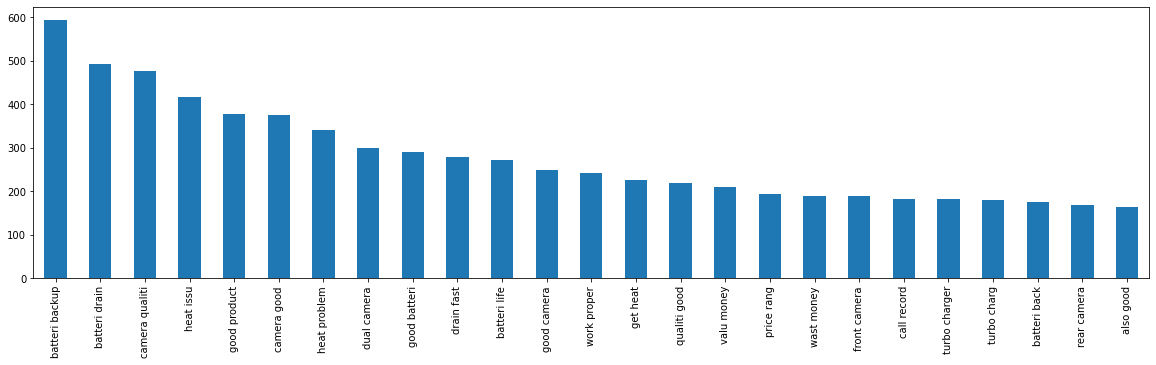

In [47]:
DTM_ubg.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5))

In [48]:
# Creating the TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vct=TfidfVectorizer(ngram_range=(2,2))

X=tfidf_vct.fit_transform(reviews['clean_review'])

tfidf=pd.DataFrame(X.toarray(),columns=tfidf_vct.get_feature_names())
tfidf

00 00  00 box  00 hour  00 realli  00 silent  00 usual  000 000  \
0        0.0     0.0      0.0        0.0        0.0       0.0      0.0   
1        0.0     0.0      0.0        0.0        0.0       0.0      0.0   
2        0.0     0.0      0.0        0.0        0.0       0.0      0.0   
3        0.0     0.0      0.0        0.0        0.0       0.0      0.0   
4        0.0     0.0      0.0        0.0        0.0       0.0      0.0   
...      ...     ...      ...        ...        ...       ...      ...   
14670    0.0     0.0      0.0        0.0        0.0       0.0      0.0   
14671    0.0     0.0      0.0        0.0        0.0       0.0      0.0   
14672    0.0     0.0      0.0        0.0        0.0       0.0      0.0   
14673    0.0     0.0      0.0        0.0        0.0       0.0      0.0   
14674    0.0     0.0      0.0        0.0        0.0       0.0      0.0   

       000 camera  000 discount  000 even  ...  இல பலம  என இயல  ஏற லல  ஒன என  \
0             0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
1             0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
2             0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
3             0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
4             0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
...           ...           ...       ...  ...     ...     ...    ...    ...   
14670         0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
14671         0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
14672         0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
14673         0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   
14674         0.0           0.0       0.0  ...     0.0     0.0    0.0    0.0   

       கவ ஆடம  பரம இல  பலம ரண  ரண _smart  றப ஒன  லல becaus  
0         0.0     0.0     0.0        0.0    0.0        0.0  
1         0.0     0.0     0.0        0.0    0.0        0.0  
2         0.0     0.0     0.0        0.0    0.0        0.0  
3         0.0     0.0     0.0        0.0    0.0        0.0  
4         0.0     0.0     0.0        0.0    0.0        0.0  
...       ...     ...     ...        ...    ...        ...  
14670     0.0     0.0     0.0        0.0    0.0        0.0  
14671     0.0     0.0     0.0        0.0    0.0        0.0  
14672     0.0     0.0     0.0        0.0    0.0        0.0  
14673     0.0     0.0     0.0        0.0    0.0        0.0  
14674     0.0     0.0     0.0        0.0    0.0        0.0  

[14675 rows x 79865 columns]

In [49]:
#Finding top 5 reviews for battery drain based on tfidf value in document
index=list(tfidf['batteri drain'].sort_values(ascending=False).head(5).index)

In [50]:
reviews.iloc[index]

sentiment                               review             clean_review
6404          1    It's battery is draining too fast       batteri drain fast
2964          0                 Battery drain fastly       batteri drain fast
6486          0        Battery draining too fast....  batteri drain fast ....
112           0  It's battery is draining very fast.       batteri drain fast
3130          0             Battery drains very fast       batteri drain fast

In [51]:
#Finding top 5 reviews for good camera

index1=list(tfidf['good camera'].sort_values(ascending=False).head(5).index)

In [52]:
reviews.iloc[index1]

sentiment                              review         clean_review
13420          1                         Good Camera          good camera
3127           1                 Good camera quality  good camera qualiti
1439           1                 GOOD CAMERA QUALITY  good camera qualiti
10756          1       Good camera or mobile is good     good camera good
13701          1  Good phone only camera is not good     good camera good

# Sentiment Prediction Strategy 3: Building our own model

- Step1: get the x and y
- Step2: Split into test and train 
- Step3: converting text to numbers (countvectorizer of tfidvectorizer)
- Step4: train
- Step5: test and get the accuracy score

In [77]:
X=reviews.clean_review.values
y=reviews.sentiment.values

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [79]:
# Create a document term matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [80]:
count_vect=CountVectorizer()

In [81]:
#Extract the features on the reviews for train -fit
# Compute the count of every word extracted in every document(review)
X_train_bow=count_vect.fit_transform(X_train)

In [82]:
#For all the fature extracted, compute the count 
# in the test data set of reviews
X_test_bow=count_vect.transform(X_test)

In [83]:
X_test_bow.shape,X_train_bow.shape

((4403, 8381), (10272, 8381))

In [84]:
#USing XGB Classifier

In [85]:
from xgboost import XGBClassifier

In [86]:
#crearing the model
model=XGBClassifier(n_estimators=1000)

In [87]:
model.fit(X_train_bow,Y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
print(model.predict(X_test_bow))

[0 0 0 ... 0 0 0]


In [89]:
model.score(X_test_bow,Y_test)

0.8428344310697252

# Model with tfidf Vectorizer

In [90]:
X=reviews.clean_review.values
y=reviews.sentiment.values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# Create a document term matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf_vect=TfidfVectorizer()

#Extract the features on the reviews for train -fit
#COmpute the count of every word extracted in every document(review)
X_train_bow=tfidf_vect.fit_transform(X_train)

#For all the fature extracted, compute the count 
# in the test data set of reviews
X_test_bow=tfidf_vect.transform(X_test)

X_test_bow.shape,X_train_bow.shape

#USing XGB Classifier

from xgboost import XGBClassifier

#creating the model
model=XGBClassifier(n_estimators=1000)

model.fit(X_train_bow,Y_train)

print(model.predict(X_test_bow))

model.score(X_test_bow,Y_test)

[13:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 0 0 ... 0 1 0]


0.8446513740631387